# Import Modules

In [1]:
# import modules
from __future__ import division, print_function

import os
import numpy as np
import matplotlib.pyplot as plt

from sympy import N
from skimage.io import imsave
from sympy.geometry import RegularPolygon
from pyclesperanto_prototype import rotate

from skimage.draw import polygon, disk, ellipse, ellipsoid
from skimage.morphology import skeletonize, octahedron, ball

#from mpmath import sin, cos, tan, cot, sec, csc, pi
%matplotlib inline

# Generate Reference Circle

In [2]:
def reference_circle(r):
    
    arr_shape = (r*2+2, r*2+2)
    center = (np.asarray(arr_shape)/2).astype(int)
    arr = np.zeros(arr_shape, dtype = np.uint8)
    yy,xx = disk(center, r)
    arr[yy,xx] = 1
    
    return arr

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_2888/2737573312.py:4: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/r50_circle.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_circle.tif'), arr.astype(np.uint8))


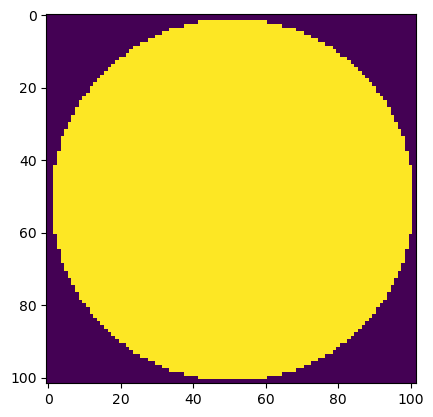

In [4]:
fpath = r'/Users/ryan/Desktop/toska_figs/reference_shapes'
r = 50
arr = reference_circle(r)
imsave(os.path.join(fpath, 'r' + str(r) + '_circle.tif'), arr.astype(np.uint8))
plt.imshow(arr)
plt.show()

# Generate 'Fractal'

In [62]:
r1 = 50
r2 = 25
r3 = 12.5

arr_size = r1 + r2 + r3
a = (0,0)
b = (r1+r2, r1+r2)
c = (r1+r2, r1+r2+r3)
d = (r1+r2+r3, r1+r2)
e = (-r1-r2, 0)
f = (-r1-r2-r3, r3)
g = (-r1-r2-r3, -r3)

In [64]:
centers = (a,b,c,d,e,f,g)

In [65]:
radii = (r1, r2, r3, r3, r2, r3, r3)

In [82]:
#def attempt_fractal(r1,r2,r3, centers, radii, pad_width):
    
arr_shape = (2*int(r1 + r2 + r3), 2*int(r1 + r2 + r3))
arr = np.zeros(arr_shape, dtype = np.uint8)
print(arr_shape)

for i in range(len(centers)):
    i_origin = np.rint(centers[i])

    yy,xx = disk(i_origin + r1, radii[i])
    print(yy,xx)
    arr[yy,xx] = 1

#return arr
#fractal_test = attempt_fractal(r1, r2, r3, centers, radii, 100)

(174, 174)
[ 1  1  1 ... 99 99 99] [41 42 43 ... 57 58 59]
[101 101 101 ... 149 149 149] [119 120 121 ... 129 130 131]
[113 113 113 113 113 113 113 114 114 114 114 114 114 114 114 114 114 114
 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 116 116 116
 116 116 116 116 116 116 116 116 116 116 116 116 116 116 117 117 117 117
 117 117 117 117 117 117 117 117 117 117 117 117 117 117 117 118 118 118
 118 118 118 118 118 118 118 118 118 118 118 118 118 118 118 118 118 118
 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119
 119 119 119 120 120 120 120 120 120 120 120 120 120 120 120 120 120 120
 120 120 120 120 120 120 120 120 121 121 121 121 121 121 121 121 121 121
 121 121 121 121 121 121 121 121 121 121 121 121 121 122 122 122 122 122
 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122
 122 122 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123
 123 123 123 123 123 123 123 123 123 124 124 124 124 124 124 124 124 124
 124 

In [59]:
bud1 = (a,a)
bud2a = (a,b)
bud2b = (a,2*a-b)
(bud1, bud2a, bud2b)

((173.0, 173.0), (173.0, 184.0), (173.0, 162.0))

# Generate Polygons

In [4]:
def reference_polygon(r_circumscribe, n_sides):
    
    arr_shape = (2*r_circumscribe+2, 2*r_circumscribe+2)
    center = (np.asarray(arr_shape)/2).astype(int)
    arr = np.zeros(arr_shape, dtype = np.uint8)
    
    verts = RegularPolygon(center, r_circumscribe, n_sides).vertices
    verts = [N(i) for i in list(verts)]
    vy = np.empty(n_sides, dtype=int)
    vx = np.empty(n_sides, dtype=int)
    for i in range(n_sides):
        vy[i] = round(verts[i][0])
        vx[i] = round(verts[i][1])
    yy,xx = polygon(vy, vx)
    arr[yy,xx] = 1
    
    return arr

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n3_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


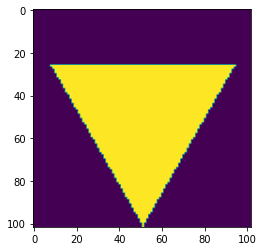

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n4_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


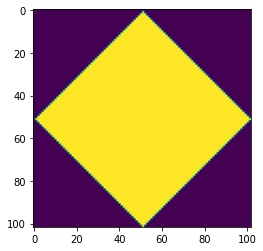

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n5_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


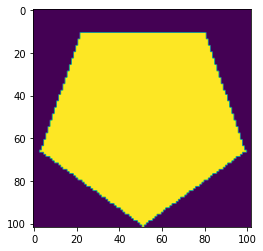

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n6_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


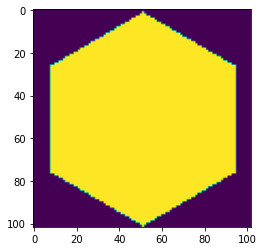

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n7_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


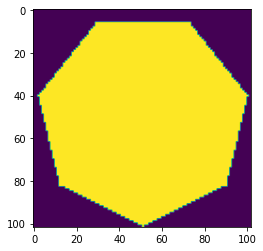

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n8_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


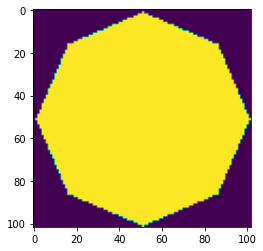

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n9_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


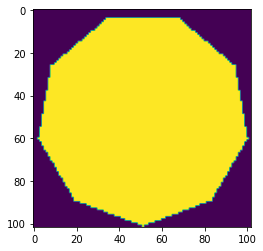

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n10_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


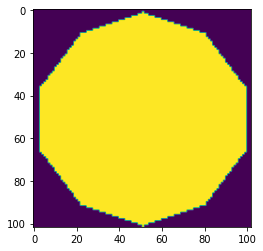

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n11_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


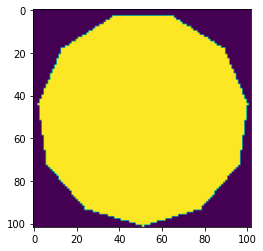

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n12_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


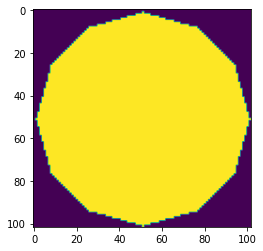

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n13_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


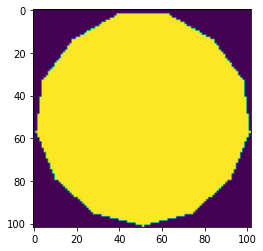

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n14_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


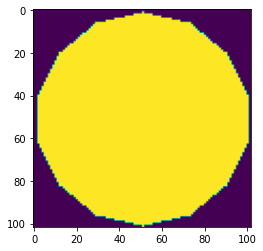

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n15_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


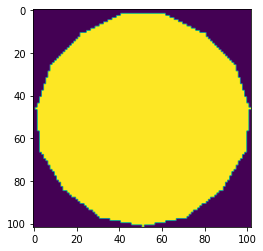

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n16_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


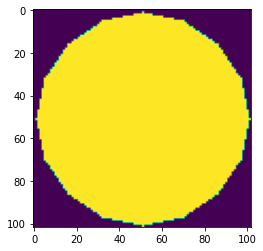

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n17_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


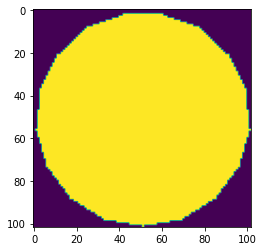

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n18_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


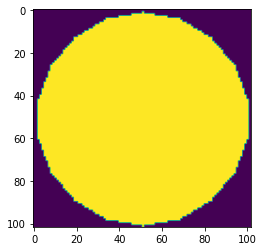

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n19_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


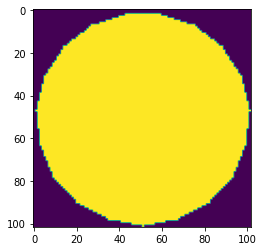

<ipython-input-55-e972a3f3e7b8>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons/r50_n20_polygon.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))


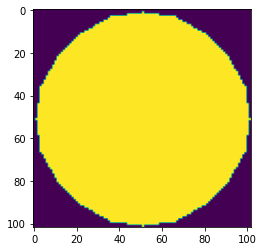

In [55]:
fpath = r'/Users/ryan/Desktop/ToSkA Figures/reference_shapes/polygons'
r = 50
n_sides = range(3, 21, 1)
for i in n_sides:
    arr = reference_polygon(r, i)
    imsave(os.path.join(fpath, 'r' + str(r) + '_n' + str(i) + '_polygon.tif'), arr.astype(np.uint8))
    plt.imshow(arr)
    plt.show()

# Generate Rectangles

In [6]:
def reference_rectangle(l, w):
    
    arr = np.ones((l,w))
    arr = np.pad(arr, (1,1))
    
    return arr

<ipython-input-56-d7219ce4ea12>:5: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/l50_w25.tif is a low contrast image
  imsave(os.path.join(fpath, 'l' + str(l) + '_w' + str(w) + '.tif'), arr.astype(np.uint8))


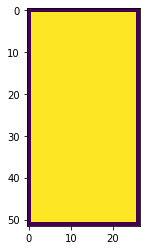

In [56]:
fpath = r'/Users/ryan/Desktop/ToSkA Figures/reference_shapes'
l = 50
w = 25
arr = reference_rectangle(l, w)
imsave(os.path.join(fpath, 'l' + str(l) + '_w' + str(w) + '.tif'), arr.astype(np.uint8))
plt.imshow(arr)
plt.show()

# Generate Ellipses

In [8]:
def reference_ellipse(minor_r, major_r):
    
    arr_shape = (2*major_r+2, 2*major_r+2)
    center = (np.asarray(arr_shape)/2).astype(int)
    arr = np.zeros(arr_shape, dtype = np.uint8)
    yy, xx = ellipse(center[0], center[1], minor_r, major_r)
    arr[yy,xx] = 1
    
    return arr

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b10.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


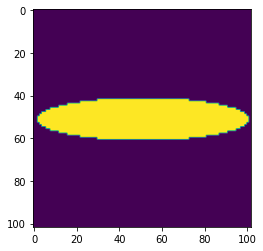

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b11.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


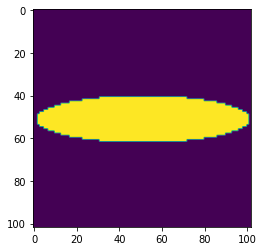

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b12.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


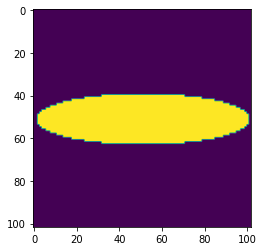

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b13.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


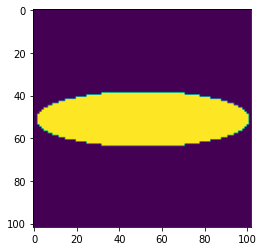

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b14.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


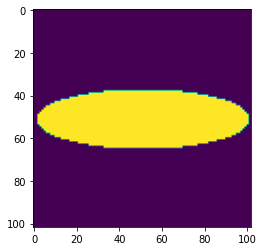

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b15.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


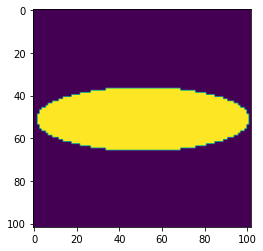

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b16.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


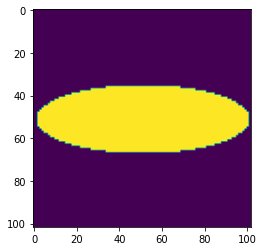

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b17.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


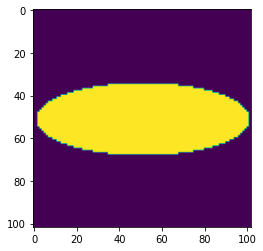

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b18.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


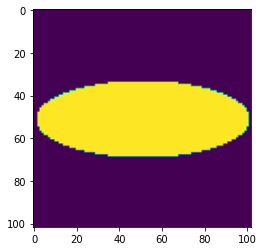

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b19.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


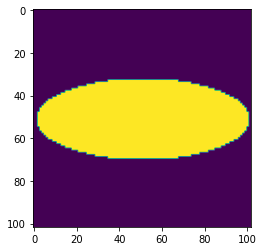

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b20.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


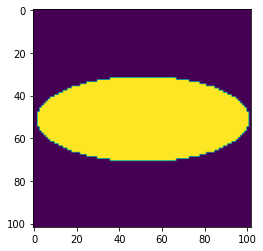

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b21.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


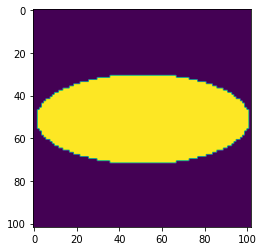

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b22.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


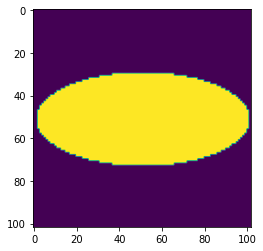

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b23.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


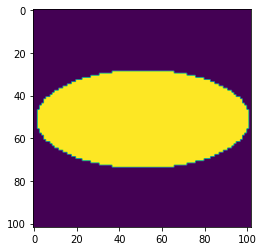

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b24.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


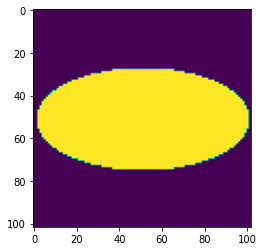

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b25.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


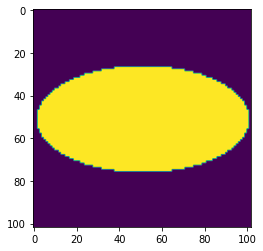

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b26.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


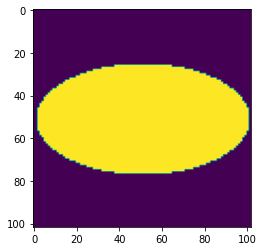

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b27.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


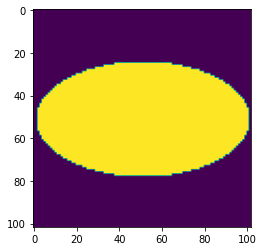

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b28.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


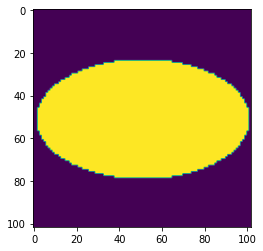

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b29.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


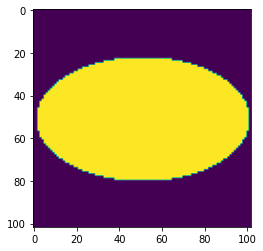

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b30.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


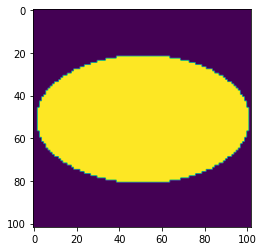

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b31.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


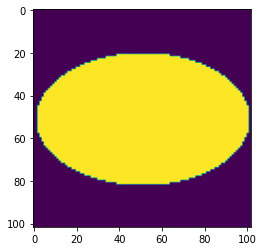

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b32.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


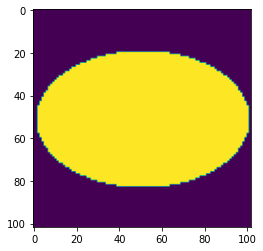

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b33.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


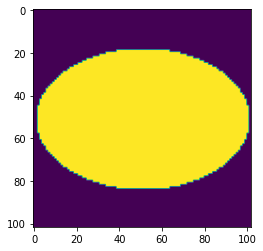

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b34.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


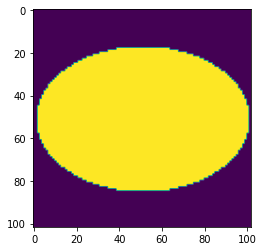

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b35.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


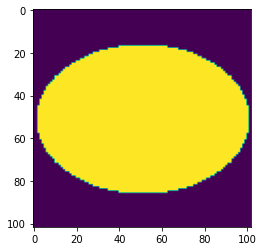

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b36.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


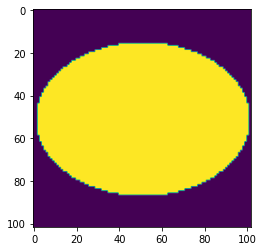

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b37.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


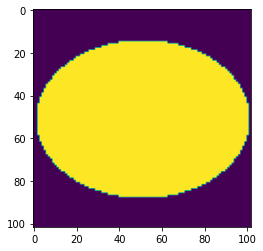

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b38.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


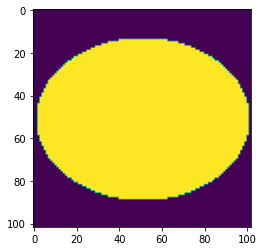

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b39.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


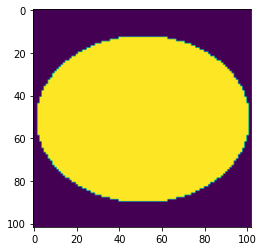

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b40.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


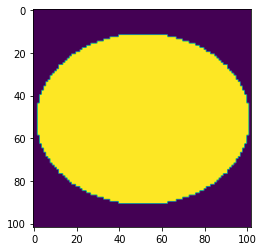

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b41.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


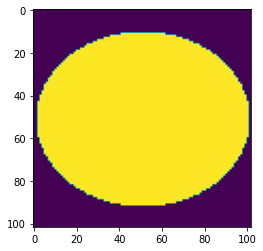

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b42.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


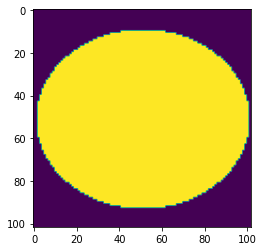

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b43.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


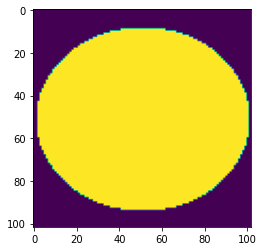

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b44.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


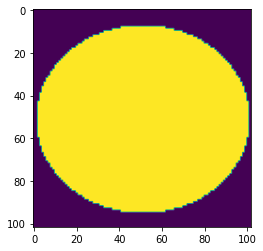

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b45.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


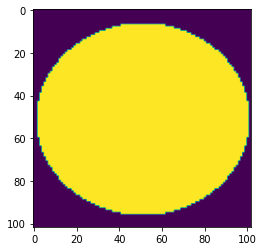

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b46.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


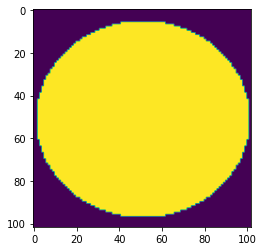

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b47.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


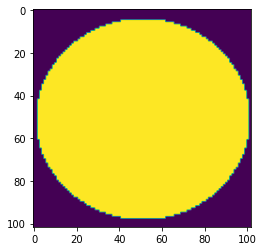

<ipython-input-57-86c46ab3cb5a>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses/a50_b48.tif is a low contrast image
  imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))


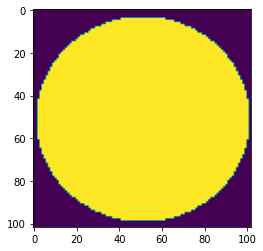

In [57]:
fpath = r'/Users/ryan/Desktop/ToSkA Figures/reference_shapes/ellipses'
major_r = 50
minor_range = range(int(major_r*0.2), major_r-1, 1)
for i in minor_range:
    arr = reference_ellipse(i, major_r)
    imsave(os.path.join(fpath, 'a' + str(r) + '_b' + str(i) + '.tif'), arr.astype(np.uint8))
    plt.imshow(arr)
    plt.show()

# Generate Crescents

In [10]:
def reference_crescent_moon(r, offset):
    
    ## initialize array and draw base circle
    arr_shape = (r*2+2, r*2+2)
    center = (np.asarray(arr_shape)/2).astype(int)
    arr = np.zeros(arr_shape, dtype = np.uint8)
    yy,xx = disk(center, r)
    arr[yy,xx] = 1
    
    ## draw offset circle and remove intersection
    y_lim, x_lim = arr.shape
    offset_yy, offset_xx = disk(center + offset, r)
    offset_coords = np.vstack((offset_yy, offset_xx)).T
    
    y_high = np.asarray(np.where(offset_coords[:,0] > y_lim-1)[0])
    x_high = np.asarray(np.where(offset_coords[:,1] > x_lim-1)[0])
    xy_high = list(set(np.concatenate((y_high, x_high))))
    xy_high = np.sort(xy_high)[::-1].astype(int)
    
    offset_coords = np.delete(offset_coords, xy_high, axis = 0)
    offset_yy, offset_xx = (offset_coords[:,0], offset_coords[:,1])
    arr[offset_yy, offset_xx] = 0
    
    return arr

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset1.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


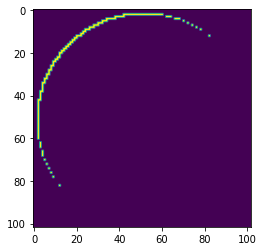

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset2.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


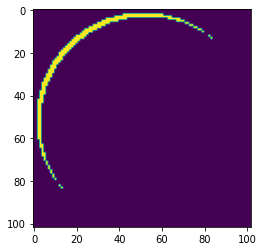

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset3.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


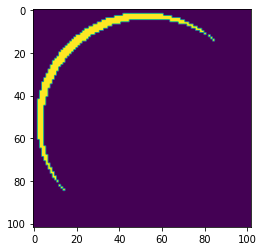

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset4.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


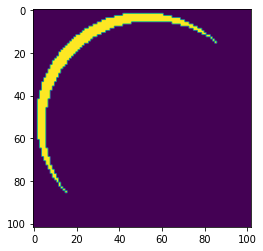

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset5.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


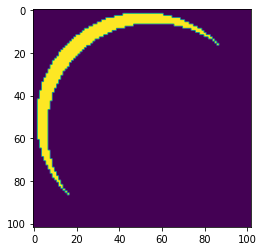

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset6.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


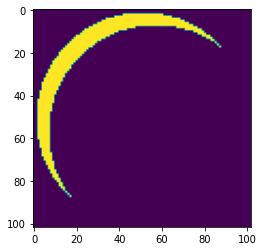

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset7.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


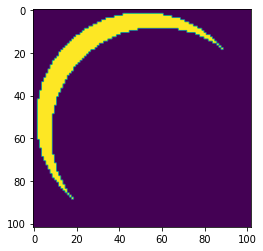

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset8.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


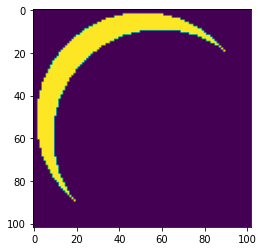

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset9.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


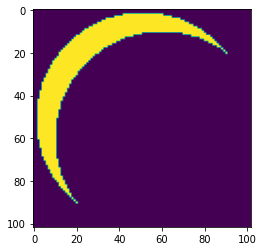

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset10.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


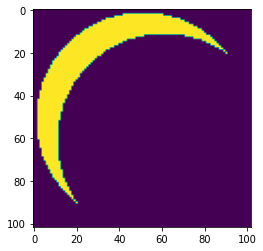

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset11.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


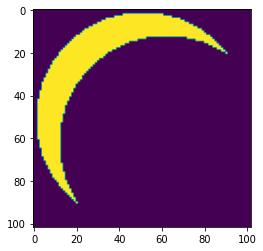

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset12.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


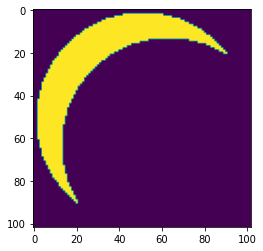

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset13.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


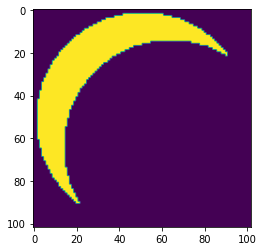

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset14.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


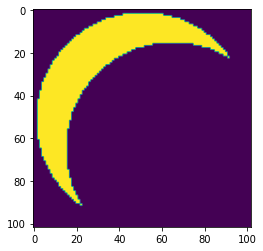

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset15.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


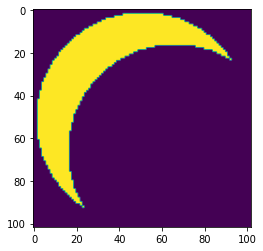

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset16.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


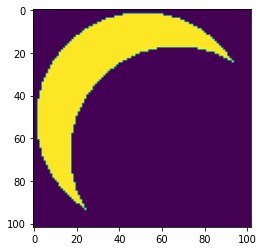

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset17.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


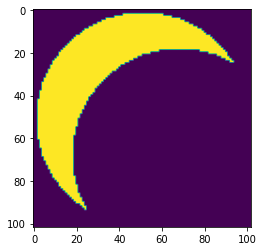

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset18.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


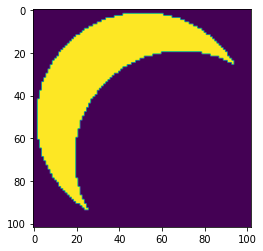

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset19.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


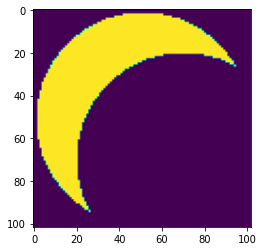

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset20.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


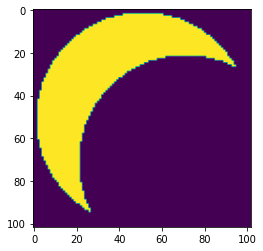

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset21.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


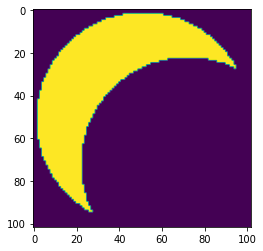

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset22.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


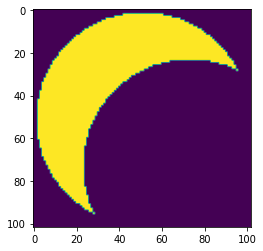

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset23.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


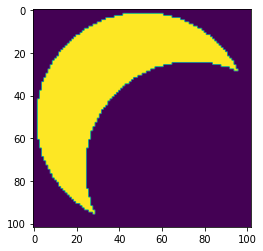

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset24.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


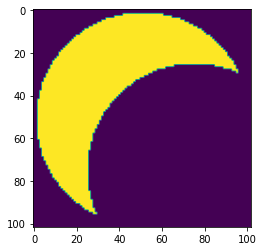

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset25.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


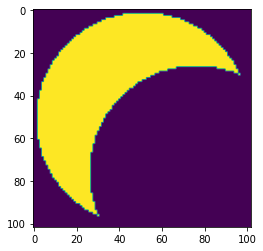

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset26.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


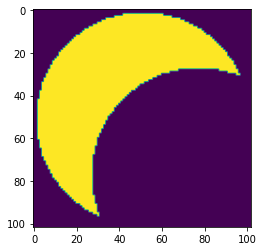

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset27.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


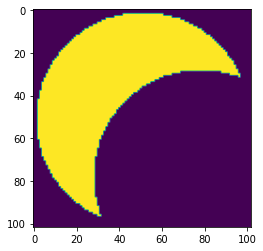

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset28.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


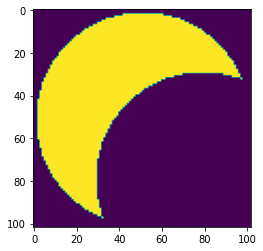

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset29.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


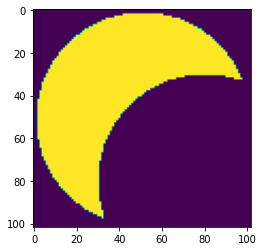

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset30.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


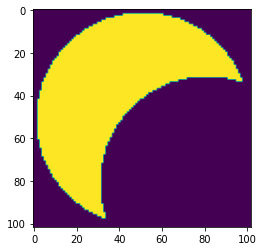

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset31.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


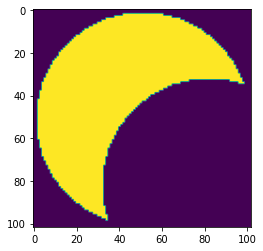

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset32.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


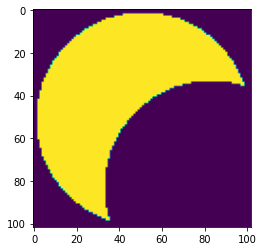

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset33.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


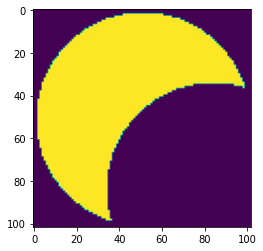

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset34.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


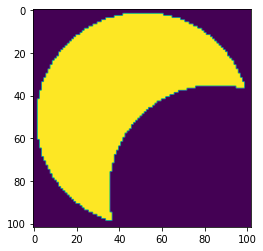

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset35.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


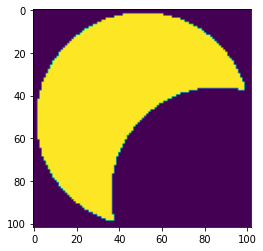

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset36.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


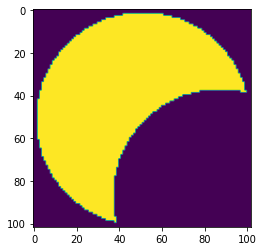

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset37.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


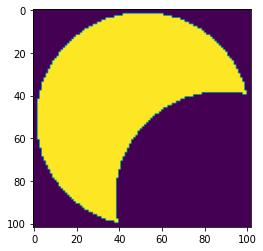

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset38.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


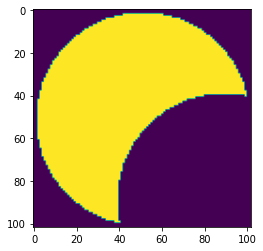

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset39.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


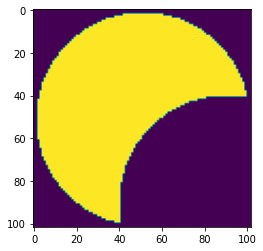

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset40.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


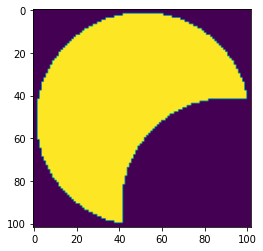

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset41.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


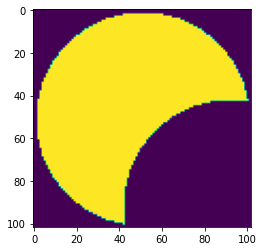

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset42.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


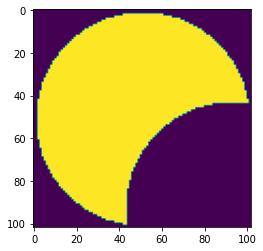

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset43.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


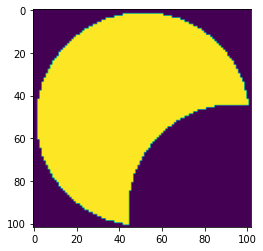

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset44.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


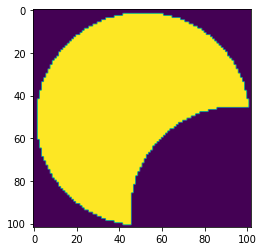

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset45.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


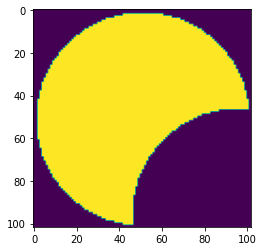

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset46.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


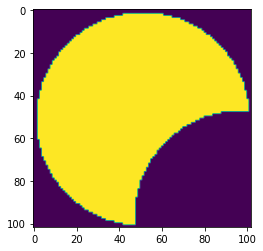

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset47.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


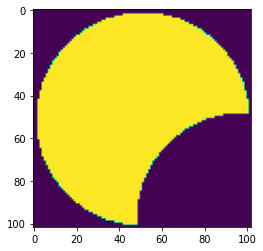

<ipython-input-38-95b6e79281e3>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons/radius50_offset48.tif is a low contrast image
  imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))


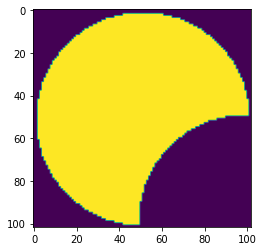

In [38]:
fpath = r'/Users/ryan/Desktop/ToSkA Figures/reference_shapes/moons'
r = 50
offset_range = range(1, r-1, 1)
for i in offset_range:
    arr = reference_crescent_moon(r, i)
    imsave(os.path.join(fpath, 'radius' + str(r) + '_offset' + str(i) + '.tif'), arr.astype(np.uint8))
    plt.imshow(arr)
    plt.show()

In [12]:
def reference_pacman_crescent(r1, r2):
    
    '''r1 must be larger than r2.'''
    
    ## initialize array and draw base circle
    arr_shape = (r1*2+2, r1*2+2)
    center = (np.asarray(arr_shape)/2).astype(int)
    arr = np.zeros(arr_shape, dtype = np.uint8)
    r1_yy,r1_xx = disk(center, r1)
    arr[r1_yy,r1_xx] = 1
    
    ## draw second circle & remove intersection
    y_lim, x_lim = arr.shape
    r2_yy, r2_xx = disk((center[0] + r1, center[1]), r2)
    r2_coords = np.vstack((r2_yy, r2_xx)).T
    
    y_high = np.asarray(np.where(r2_coords[:,0] > y_lim-1)[0])
    x_high = np.asarray(np.where(r2_coords[:,1] > x_lim-1)[0])
    xy_high = list(set(np.concatenate((y_high, x_high))))
    xy_high = np.sort(xy_high)[::-1].astype(int)
    
    r2_coords = np.delete(r2_coords, xy_high, axis = 0)
    r2_yy, r2_xx = (r2_coords[:,0], r2_coords[:,1])
    arr[r2_yy, r2_xx] = 0
    
    return arr

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_1.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


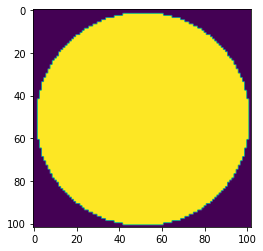

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_2.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


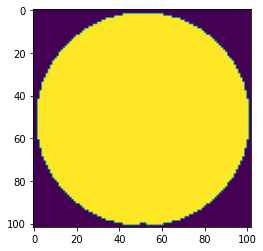

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_3.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


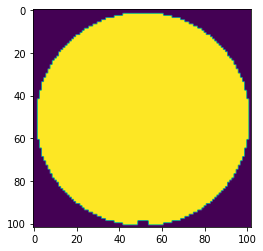

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_4.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


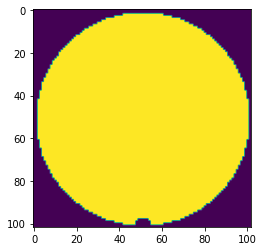

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_5.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


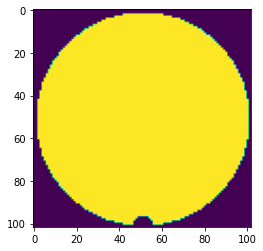

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_6.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


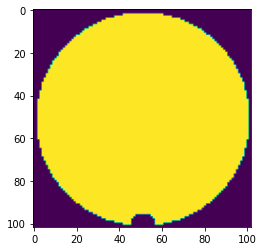

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_7.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


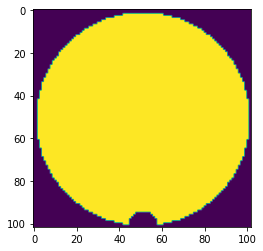

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_8.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


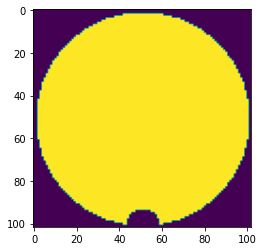

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_9.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


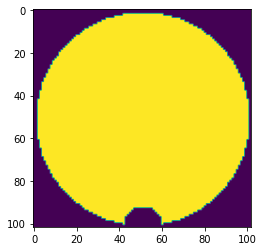

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_10.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


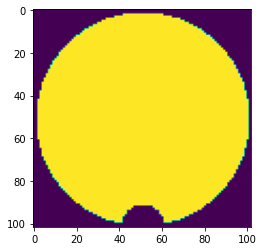

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_11.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


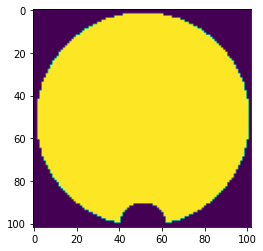

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_12.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


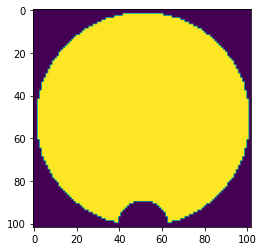

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_13.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


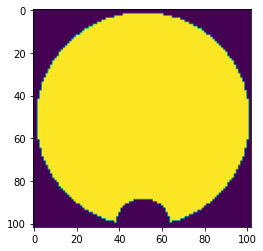

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_14.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


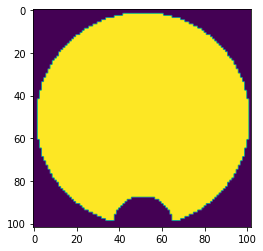

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_15.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


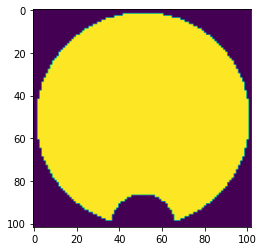

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_16.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


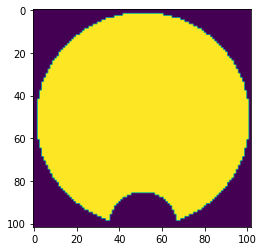

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_17.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


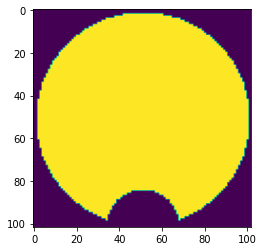

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_18.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


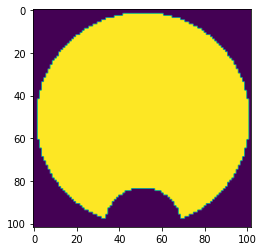

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_19.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


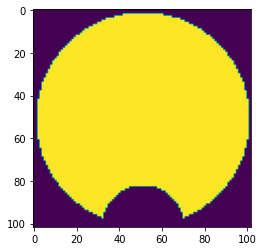

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_20.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


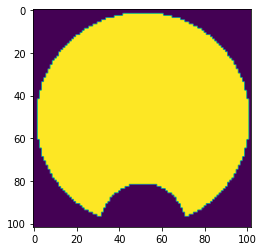

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_21.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


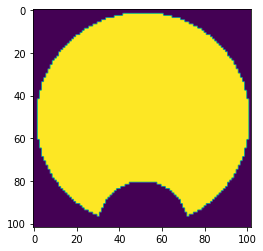

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_22.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


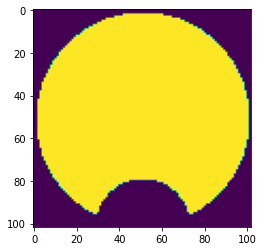

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_23.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


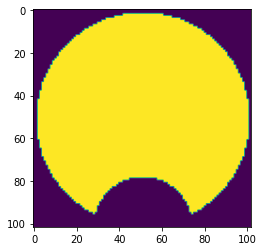

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_24.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


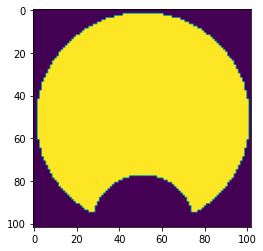

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_25.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


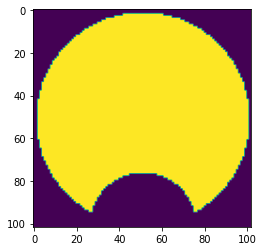

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_26.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


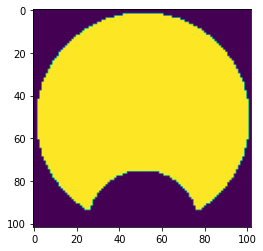

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_27.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


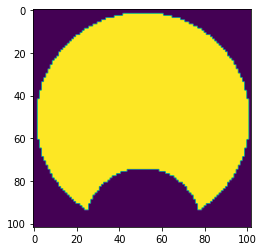

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_28.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


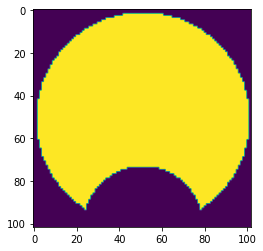

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_29.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


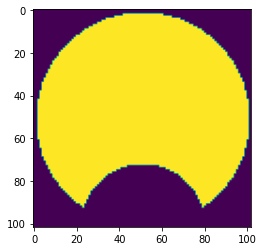

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_30.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


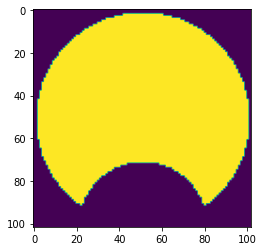

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_31.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


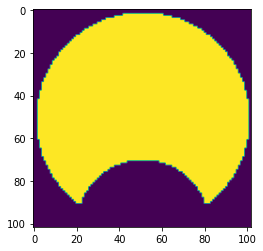

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_32.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


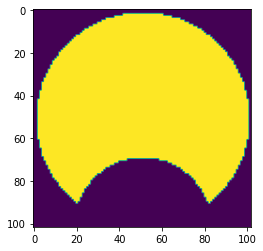

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_33.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


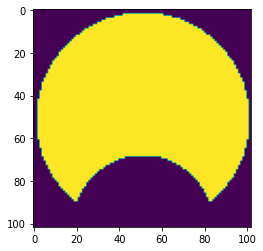

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_34.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


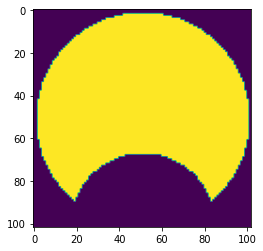

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_35.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


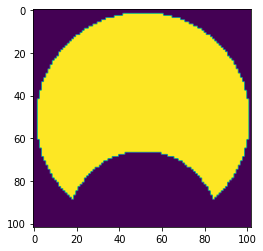

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_36.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


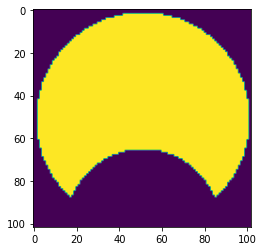

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_37.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


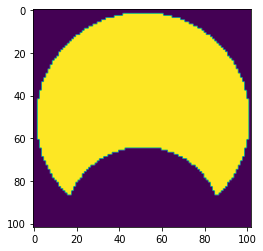

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_38.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


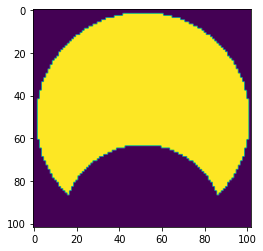

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_39.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


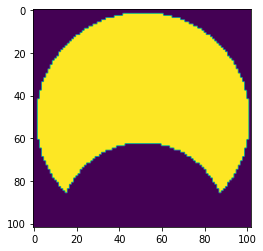

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_40.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


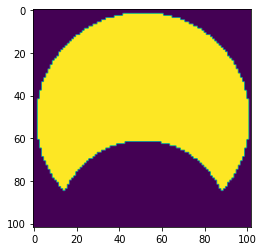

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_41.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


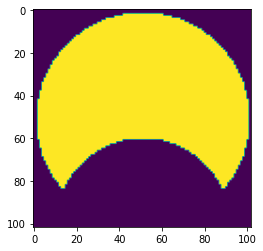

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_42.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


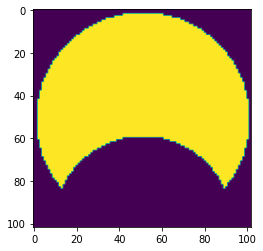

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_43.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


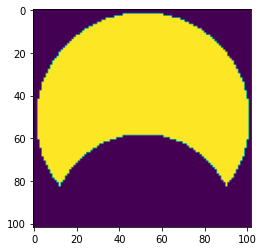

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_44.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


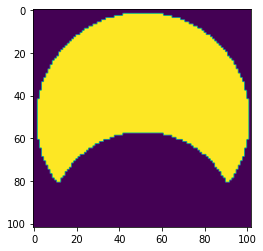

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_45.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


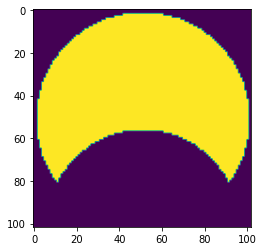

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_46.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


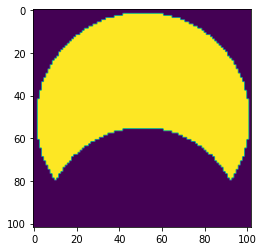

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_47.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


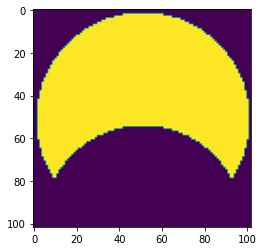

<ipython-input-40-393ed4d374ca>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans/r1_50_r2_48.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


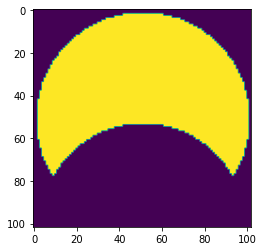

In [40]:
fpath = r'/Users/ryan/Desktop/ToSkA Figures/reference_shapes/pacmans'
r1 = 50
r2_range = range(1, r1-1, 1)
for i in r2_range:
    arr = reference_pacman_crescent(r1, i)
    imsave(os.path.join(fpath, 'r1_' + str(r) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))
    plt.imshow(arr)
    plt.show()

# Generate Reference Sphere

In [2]:
def reference_sphere(r):
    
    arr = ellipsoid(r,r,r)
    
    return arr

<ipython-input-5-ed07313d1176>:4: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/r50_sphere.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_sphere.tif'), arr.astype(np.uint8))


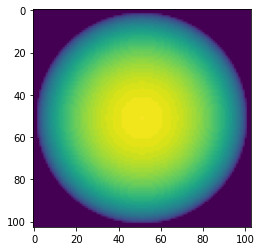

In [5]:
fpath = r'/Users/ryan/Desktop/ToSkA Figures/reference_shapes'
r = 50
arr = reference_sphere(50)
imsave(os.path.join(fpath, 'r' + str(r) + '_sphere.tif'), arr.astype(np.uint8))
plt.imshow(sphere.sum(axis = 0))
plt.show()

# Generate Ellipsoids

In [2]:
def reference_ellipsoid(r, ratio1, ratio2):
    
    arr = ellipsoid(r, ratio1 * r, ratio2 * r)
    
    return arr

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1505596332.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids/r_50_ratio1_1_ratio2_0.1.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))


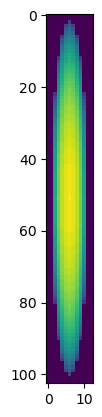

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1505596332.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids/r_50_ratio1_1_ratio2_0.2.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))


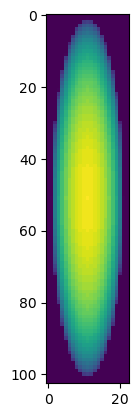

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1505596332.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids/r_50_ratio1_1_ratio2_0.3.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))


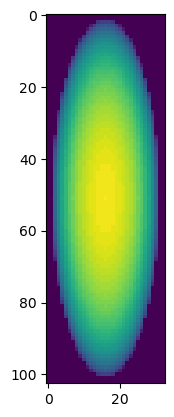

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1505596332.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids/r_50_ratio1_1_ratio2_0.4.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))


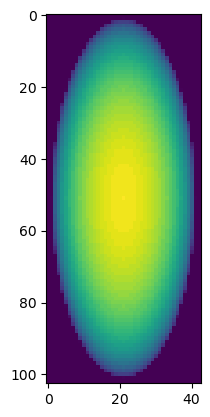

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1505596332.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids/r_50_ratio1_1_ratio2_0.5.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))


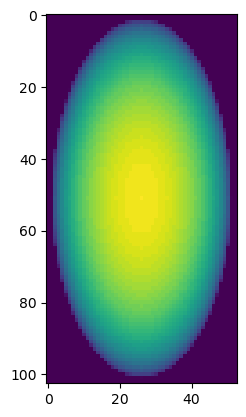

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1505596332.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids/r_50_ratio1_1_ratio2_0.6.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))


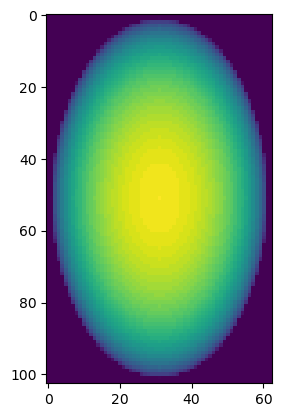

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1505596332.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids/r_50_ratio1_1_ratio2_0.7.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))


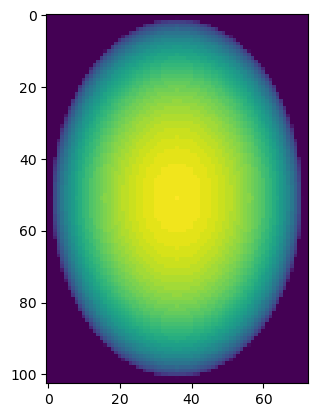

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1505596332.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids/r_50_ratio1_1_ratio2_0.8.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))


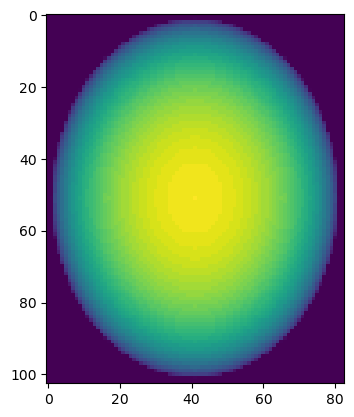

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1505596332.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids/r_50_ratio1_1_ratio2_0.9.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))


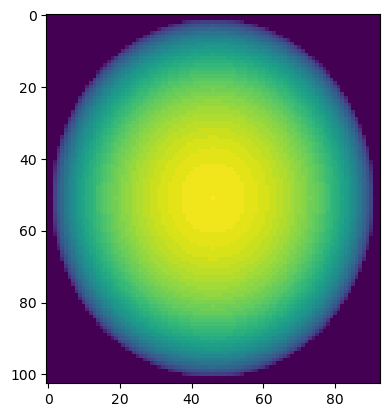

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1505596332.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids/r_50_ratio1_1_ratio2_1.0.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))


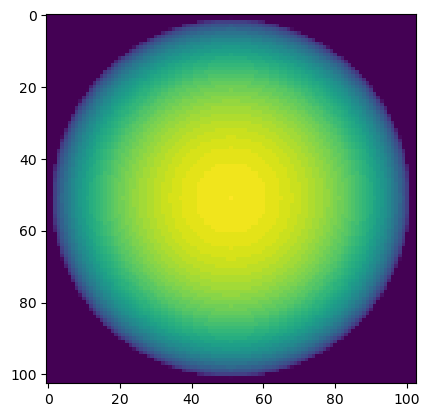

In [13]:
fpath = r'/Users/ryan/Desktop/toska_figs/reference_shapes/ellipsoids'
r = 50
ratio1 = 1
ratio2_range = np.arange(0.1, 1.1, 0.1)
for i in ratio2_range:
    arr = reference_ellipsoid(r, ratio1, i)
    imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(ratio1) + '_ratio2_' + str(round(i, ndigits = 2)) + '.tif'), arr.astype(np.uint8))
    plt.imshow(arr.sum(axis = 0))
    plt.show()

# Generate Reference Cube

In [18]:
def reference_cube(r):
    
    d = 2*r
    arr = np.ones((d,d,d), dtype = np.uint8)
    arr = np.pad(arr, 1)

    return arr

<ipython-input-51-79ddb729e1d4>:4: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/r50_cube.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_cube.tif'), arr.astype(np.uint8))


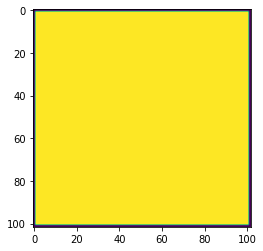

In [51]:
fpath = r'/Users/ryan/Desktop/ToSkA Figures/reference_shapes'
r = 50
arr = reference_cube(50)
imsave(os.path.join(fpath, 'r' + str(r) + '_cube.tif'), arr.astype(np.uint8))
plt.imshow(arr.sum(axis = 0))
plt.show()

# Generate Hexahedra

In [23]:
def reference_hexahedron(r, d1_ratio, d2_ratio):
    
    d = 2*r
    arr = np.ones((d, round(d1_ratio * d), round(d2_ratio * d)))
    arr = np.pad(arr, 1)
    
    return arr

<ipython-input-52-d1cb60fdd0d5>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/r_50_ratio1_0.5_ratio2_2_hexahedron.tif is a low contrast image
  imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(d1_ratio) + '_ratio2_' + str(d2_ratio) + '_hexahedron.tif'), arr.astype(np.uint8))


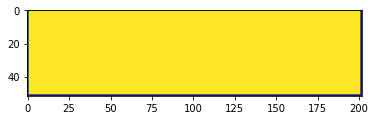

(102, 52, 202)


In [52]:
fpath = r'/Users/ryan/Desktop/ToSkA Figures/reference_shapes'
r = 50
d1_ratio = 0.5
d2_ratio = 2
hexahedron = reference_hexahedron(r, d1_ratio, d2_ratio)
imsave(os.path.join(fpath, 'r_' + str(r) + '_ratio1_' + str(d1_ratio) + '_ratio2_' + str(d2_ratio) + '_hexahedron.tif'), arr.astype(np.uint8))
plt.imshow(hexahedron.sum(axis = 0))
plt.show()
print(hexahedron.shape)

# Generate Octahedra

In [25]:
def reference_octahedron(r):
    
    arr = octahedron(r)
    arr = np.pad(arr, 1)
    
    return arr

<ipython-input-58-118285b7632d>:4: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/r50_octahedron.tif is a low contrast image
  imsave(os.path.join(fpath, 'r' + str(r) + '_octahedron.tif'), arr.astype(np.uint8))


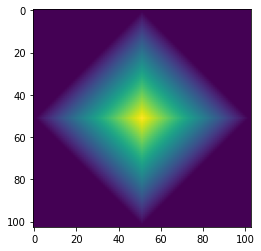

171801


In [58]:
fpath = r'/Users/ryan/Desktop/ToSkA Figures/reference_shapes'
r = 50
arr = reference_octahedron(r)
imsave(os.path.join(fpath, 'r' + str(r) + '_octahedron.tif'), arr.astype(np.uint8))
plt.imshow(arr.sum(axis = 0))
plt.show()
print(np.sum(arr))

# Generate Death Stars

In [29]:
def death_star(r1, r2, axis = 1):

    arr_size = 2*r1 + 2*r2 + 2
    
    arr1 = ellipsoid(r1,r1,r1)
    pad_width = round((arr_size - arr1.shape[0])/2) + 1
    arr1 = np.pad(arr1, pad_width)
    
    arr2 = ellipsoid(r2,r2,r2)
    pad_width = round((arr_size - arr2.shape[0])/2) + 1
    arr2 = np.pad(arr2, pad_width)
    
    coords = np.asarray(np.where(arr2)).T
    coords[:, axis] = coords[:, axis] + r1
    
    zzz = coords[:,0]
    yyy = coords[:,1]
    xxx = coords[:,2]
    arr1[zzz,yyy,xxx] = 0
    
    return arr1

<ipython-input-59-42d3f2076671>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/death_stars/r1_50_r2_10.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


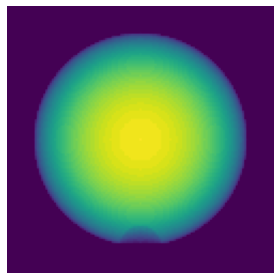

<ipython-input-59-42d3f2076671>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/death_stars/r1_50_r2_15.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


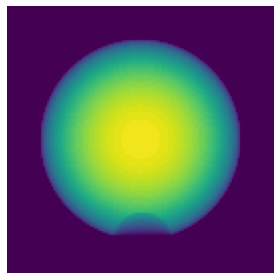

<ipython-input-59-42d3f2076671>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/death_stars/r1_50_r2_20.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


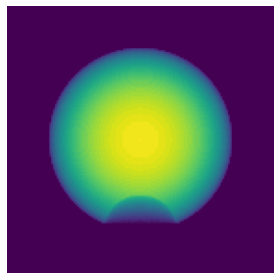

<ipython-input-59-42d3f2076671>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/death_stars/r1_50_r2_25.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


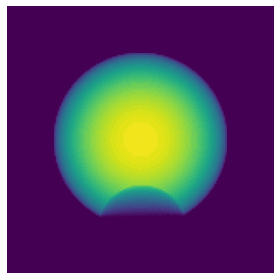

<ipython-input-59-42d3f2076671>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/death_stars/r1_50_r2_30.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


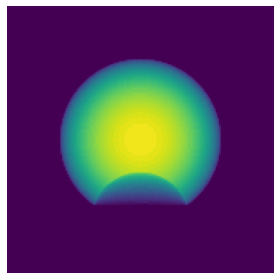

<ipython-input-59-42d3f2076671>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/death_stars/r1_50_r2_35.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


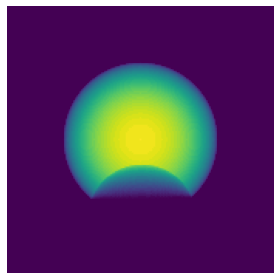

<ipython-input-59-42d3f2076671>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/death_stars/r1_50_r2_40.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


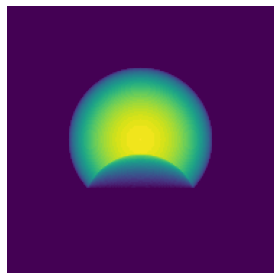

<ipython-input-59-42d3f2076671>:6: UserWarning: /Users/ryan/Desktop/ToSkA Figures/reference_shapes/death_stars/r1_50_r2_45.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


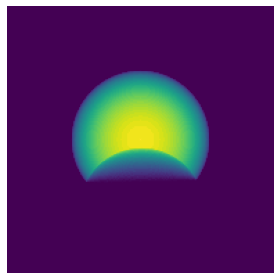

In [59]:
fpath = r'/Users/ryan/Desktop/ToSkA Figures/reference_shapes/death_stars'
r1 = 50
r2 = np.arange(10, r1-1, 5)
for i in r2:
    arr = death_star(r1, i)
    imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))
    plt.imshow(arr.sum(axis = 0))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate Semi-Hollow Spheres

In [2]:
def semi_hollow_sphere(r1, r2, offset, axis = 1):
    
    ''' r1 > r2 + offset'''
    
    arr_size = 2*r1+2
    arr1 = ellipsoid(r1,r1,r1)
    arr1 = np.pad(arr1, r2+offset)
    
    arr2 = ellipsoid(r2,r2,r2)
    arr2 = np.pad(arr2, r1+offset)
    
    coords = np.asarray(np.where(arr2)).T
    coords[:, axis] = coords[:, axis] + offset
    
    zzz = coords[:,0]
    yyy = coords[:,1]
    xxx = coords[:,2]
    arr1[zzz,yyy,xxx] = 0
    
    return arr1

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_1.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


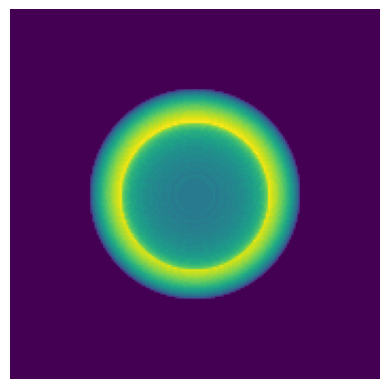

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_2.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


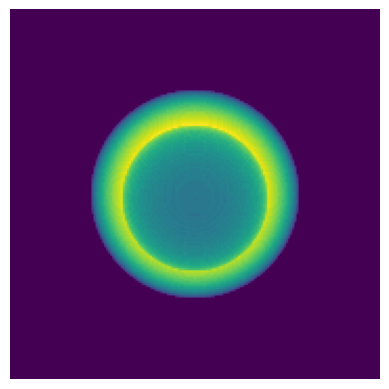

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_3.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


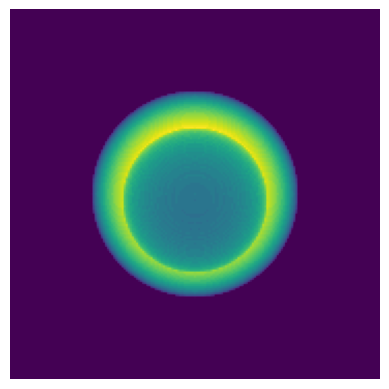

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_4.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


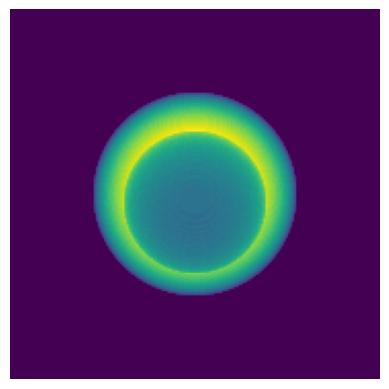

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_5.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


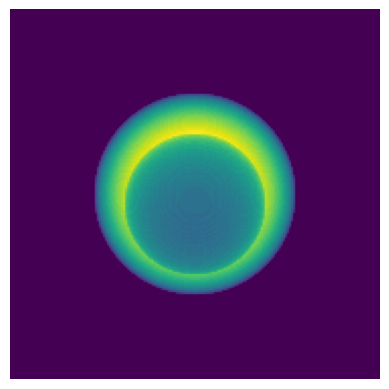

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_6.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


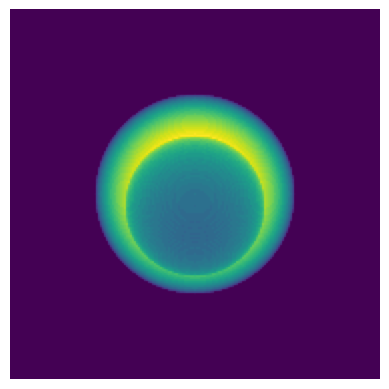

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_7.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


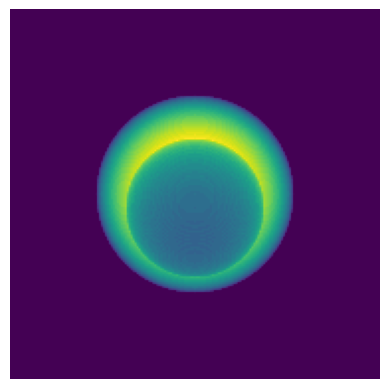

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_8.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


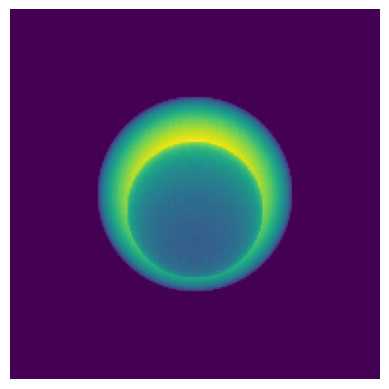

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_9.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


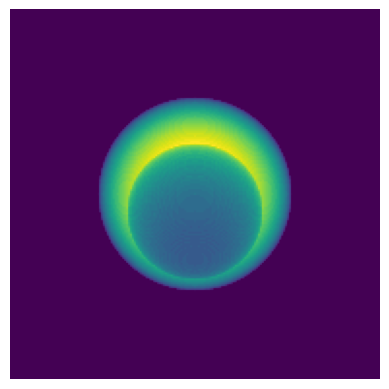

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_10.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


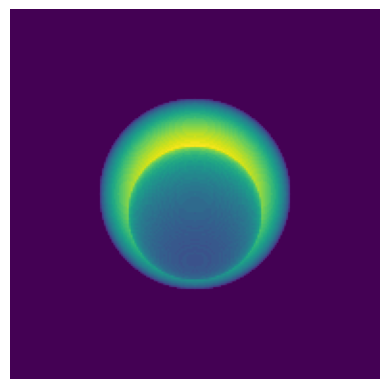

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_11.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


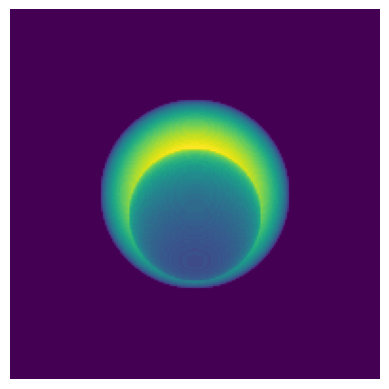

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_12.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


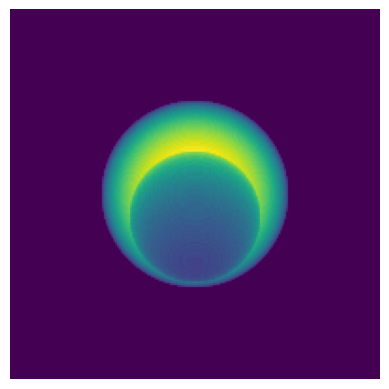

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_13.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


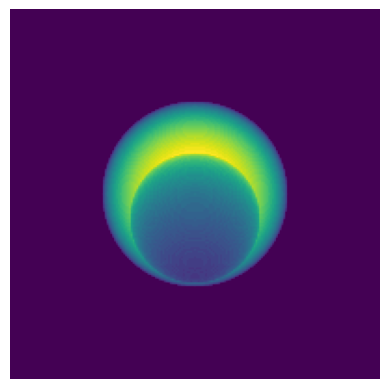

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_14.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


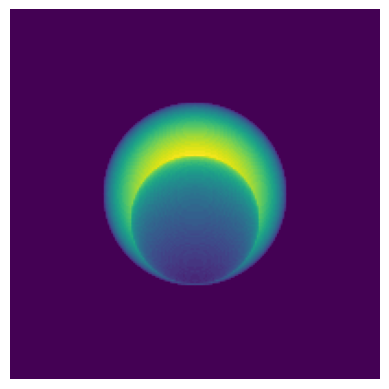

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_15.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


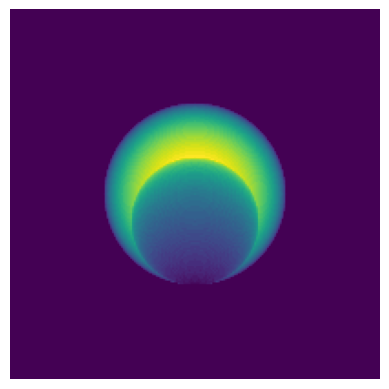

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_16.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


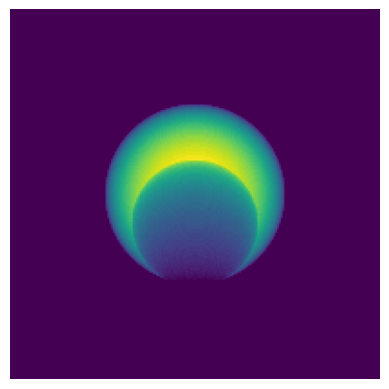

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_17.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


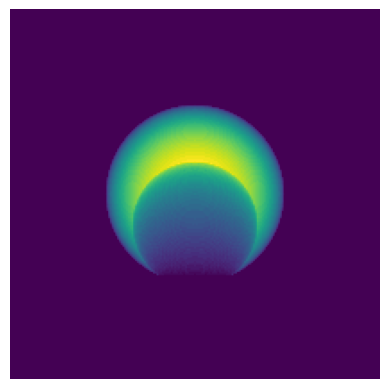

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_18.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


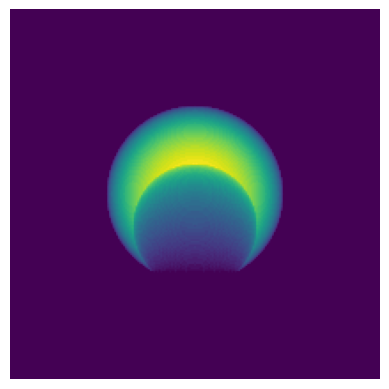

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_19.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


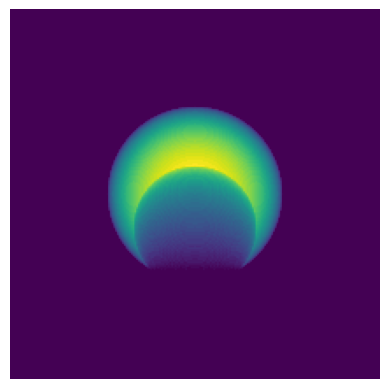

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_20.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


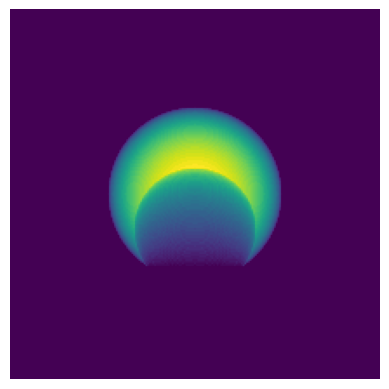

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_21.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


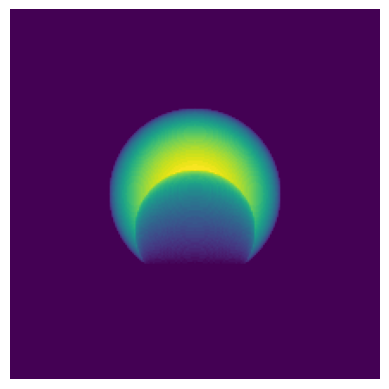

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_22.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


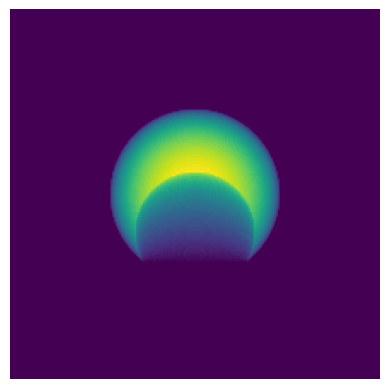

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_23.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


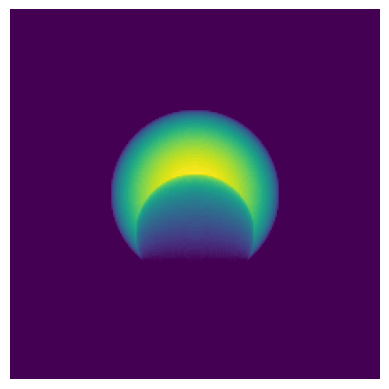

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_24.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


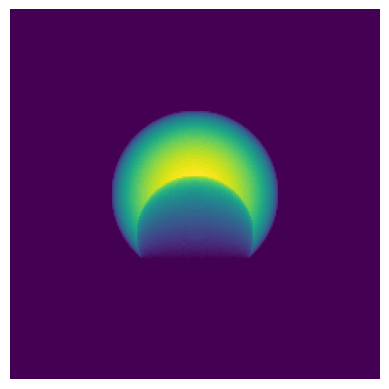

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_25.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


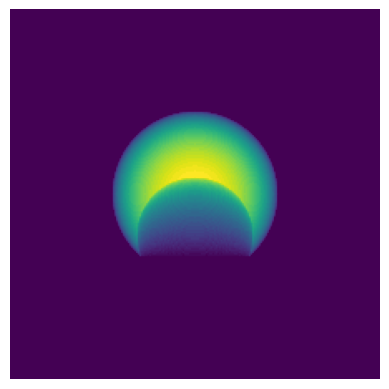

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_26.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


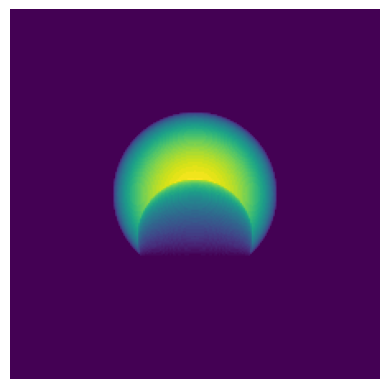

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_27.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


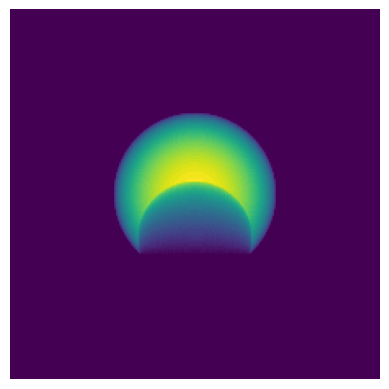

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_28.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


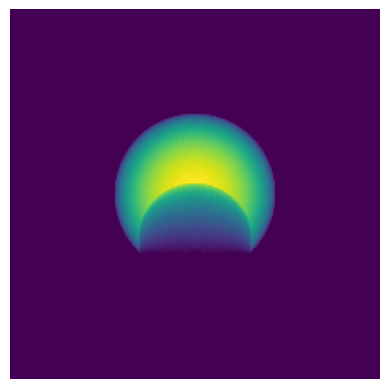

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_29.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


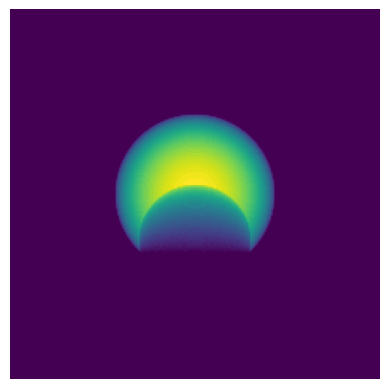

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_30.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


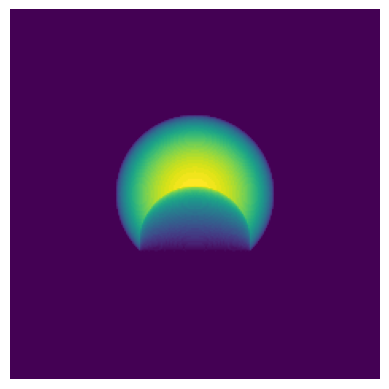

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_31.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


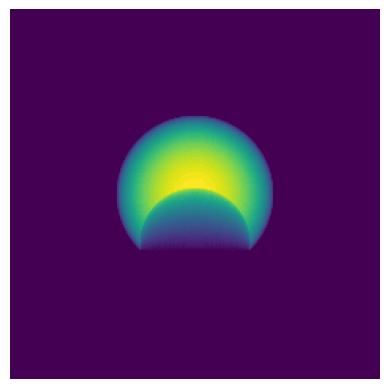

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_32.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


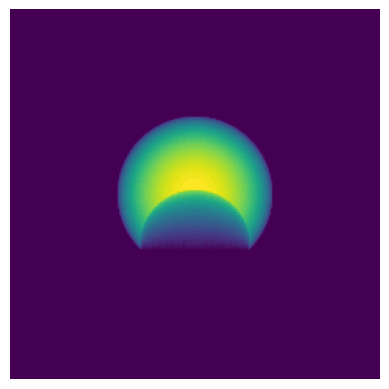

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_33.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


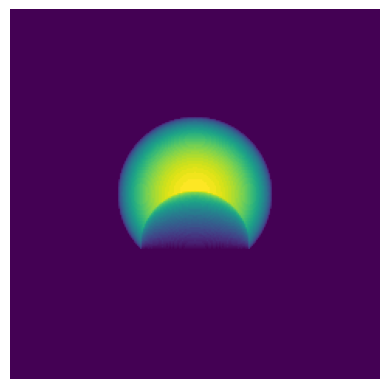

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_34.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


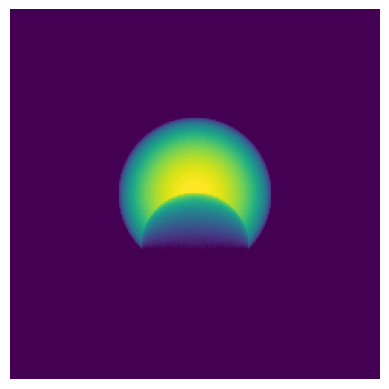

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_35.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


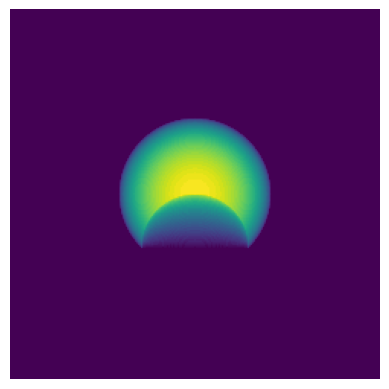

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_36.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


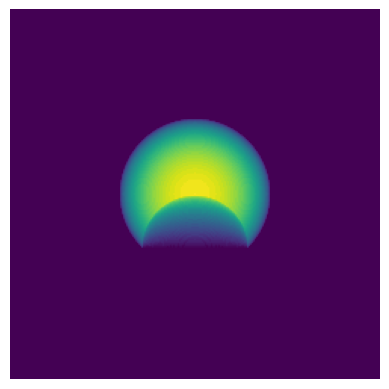

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_37.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


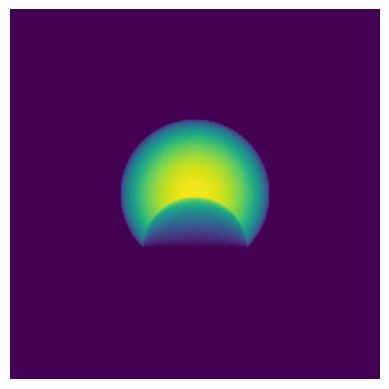

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_38.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


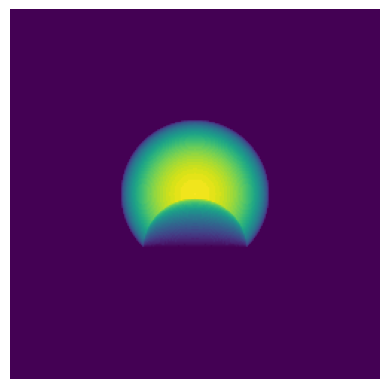

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_39.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


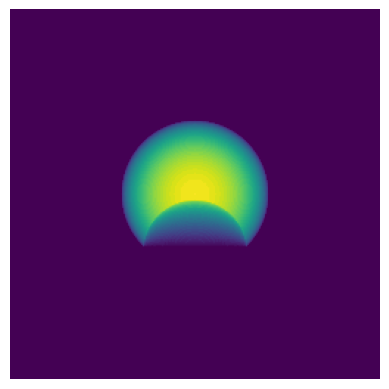

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_40.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


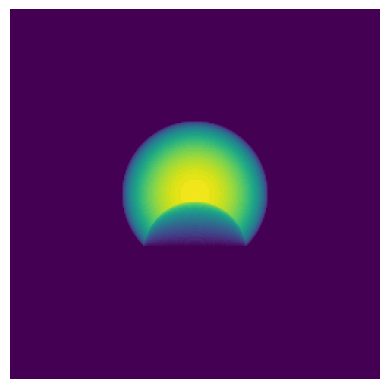

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_41.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


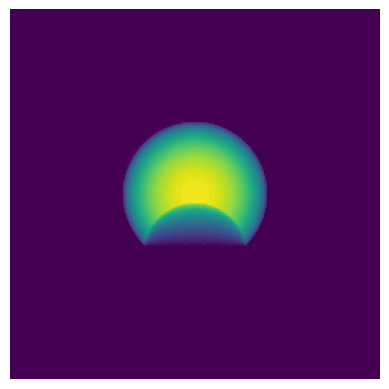

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_42.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


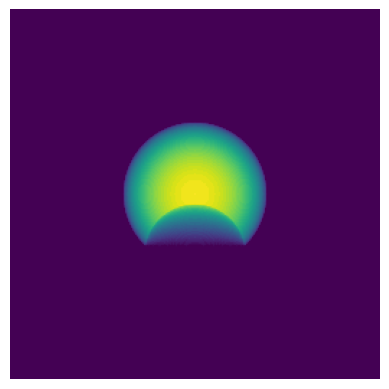

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_43.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


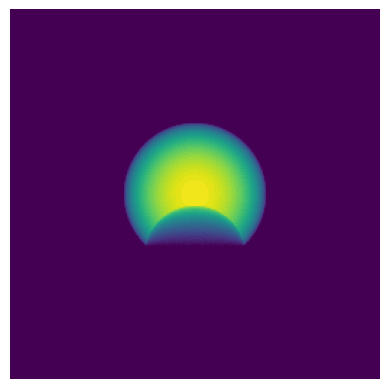

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_44.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


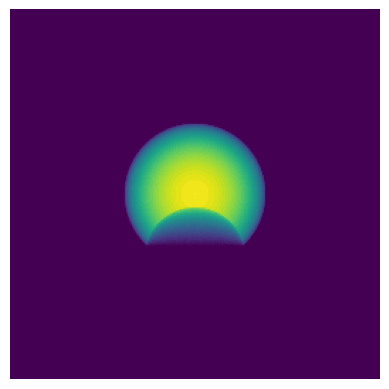

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_45.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


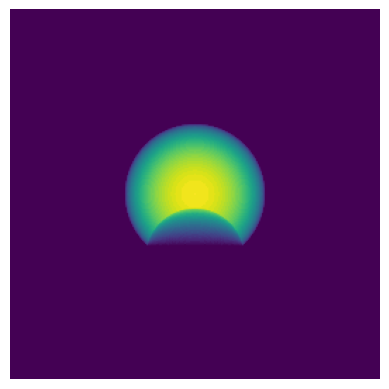

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_46.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


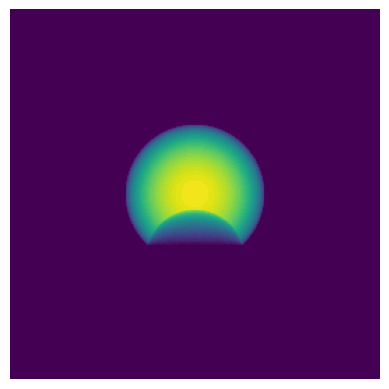

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_47.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


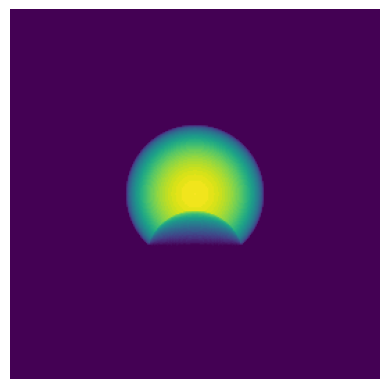

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_48.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


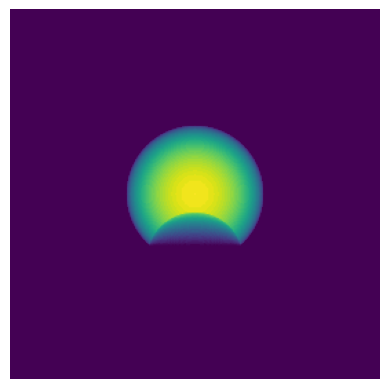

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_25321/2237364846.py:7: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35/r1_50_r2_35_offset_49.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))


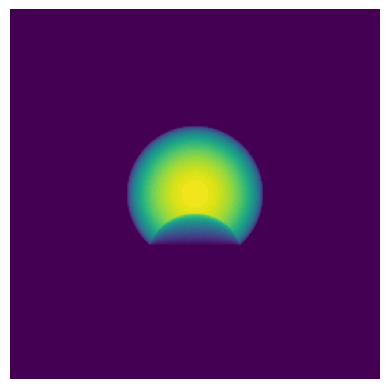

In [3]:
fpath = r'/Users/ryan/Desktop/toska_figs/reference_shapes/semi_hollow_spheres_50_35'
r1 = 50
r2 = 35
offset_range = np.arange(1, r1, 1)
for i in offset_range:
    arr = semi_hollow_sphere(r1, r2, i)
    imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(r2) + '_offset_' + str(i) +'.tif'), arr.astype(np.uint8))
    plt.imshow(arr.sum(axis = 0))
    plt.axis('off')
    plt.show()

# Generate Budding Yeast

In [18]:
def budding_yeast(r1, r2, axis = 1):
    
    '''r2 cannot be larger than r1.'''
    
    arr_size = 2*r1 + 2*r2 + 2
    
    arr1 = ellipsoid(r1,r1,r1)
    pad_width = round((arr_size - arr1.shape[0])/2) + 1
    arr1 = np.pad(arr1, pad_width)
    
    arr2 = ellipsoid(r2,r2,r2)
    pad_width = round((arr_size - arr2.shape[0])/2) + 1
    arr2 = np.pad(arr2, pad_width)
    
    coords = np.asarray(np.where(arr2)).T
    coords[:, axis] = coords[:, axis] + r1
    
    zzz = coords[:,0]
    yyy = coords[:,1]
    xxx = coords[:,2]
    arr1[zzz,yyy,xxx] = 1
    
    arr1 = np.pad(arr1, 1)
    
    return arr1

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_1.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


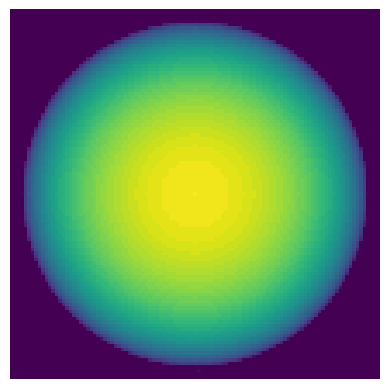

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_2.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


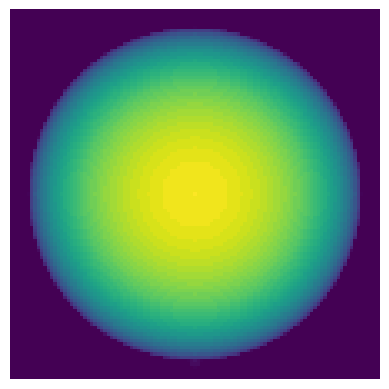

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_3.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


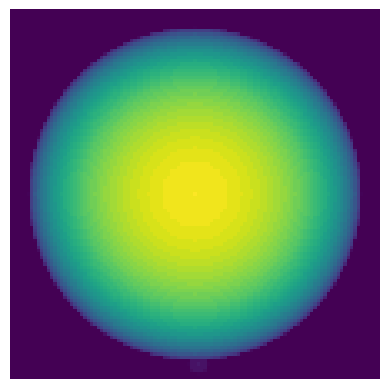

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_4.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


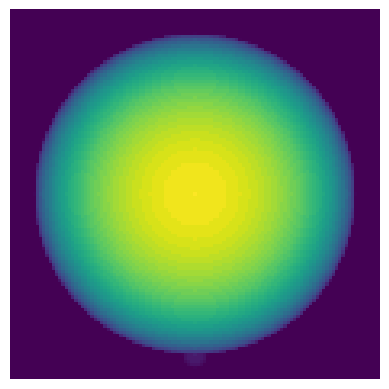

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_5.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


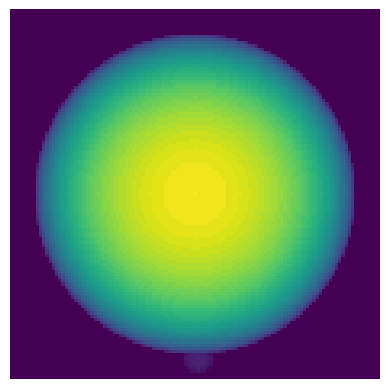

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_6.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


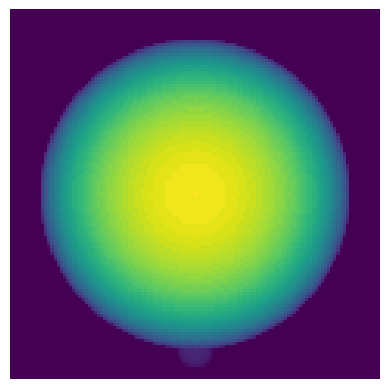

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_7.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


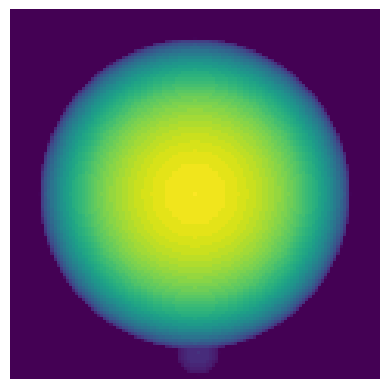

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_8.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


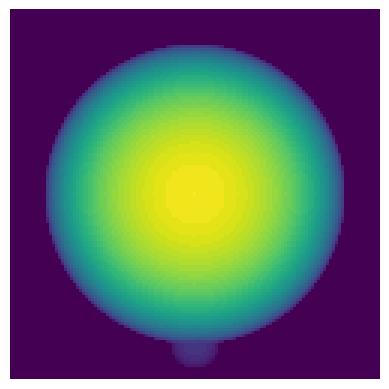

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_9.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


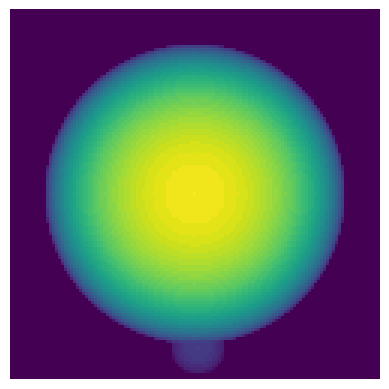

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_10.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


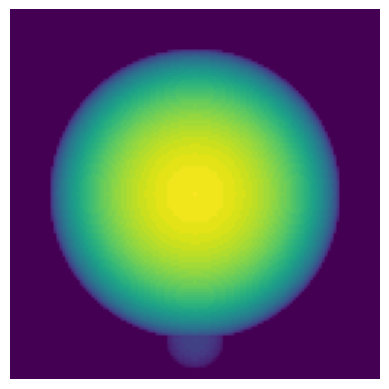

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_11.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


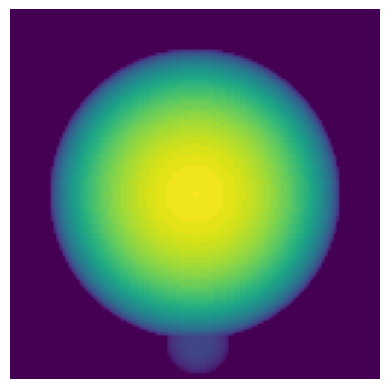

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_12.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


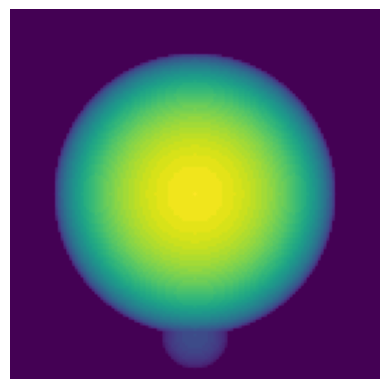

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_13.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


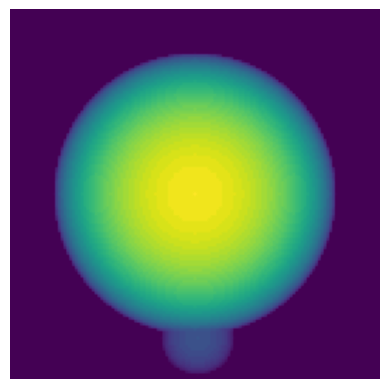

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_14.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


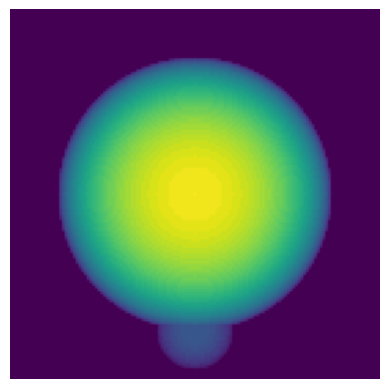

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_15.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


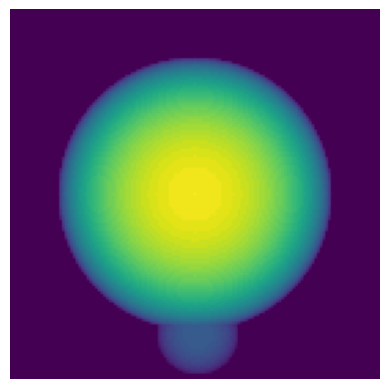

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_16.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


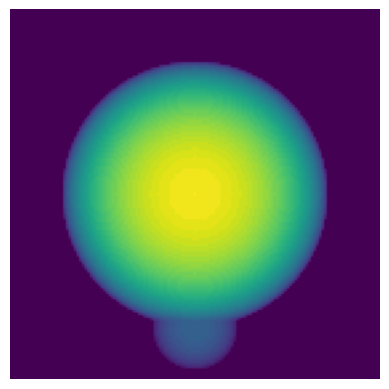

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_17.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


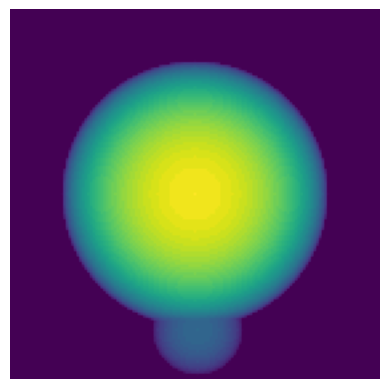

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_18.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


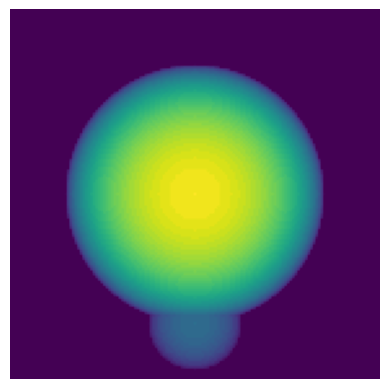

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_19.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


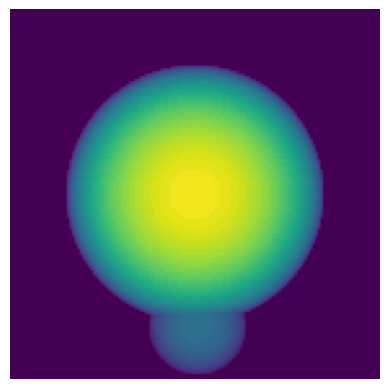

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_20.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


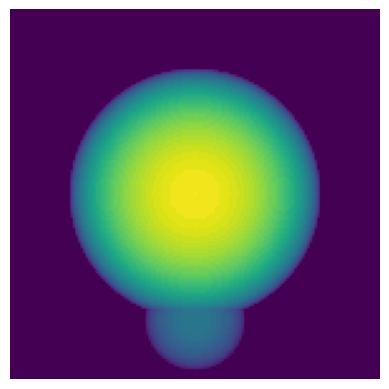

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_21.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


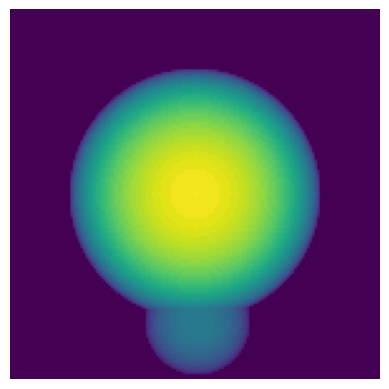

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_22.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


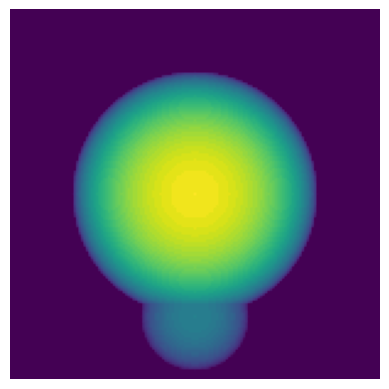

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_23.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


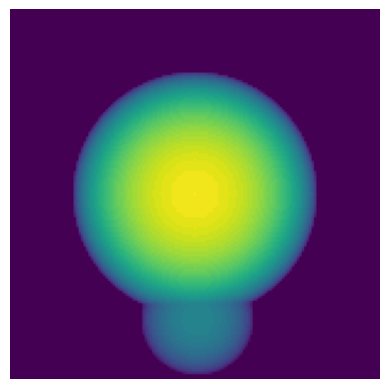

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_24.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


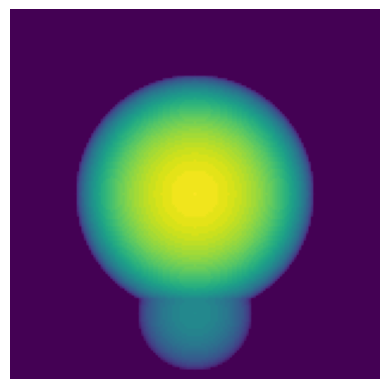

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_25.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


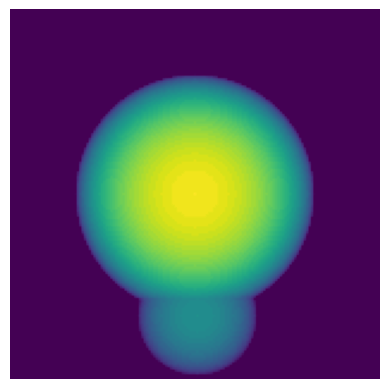

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_26.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


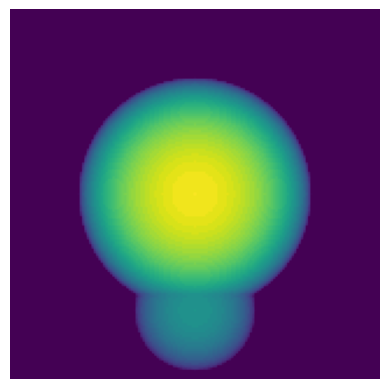

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_27.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


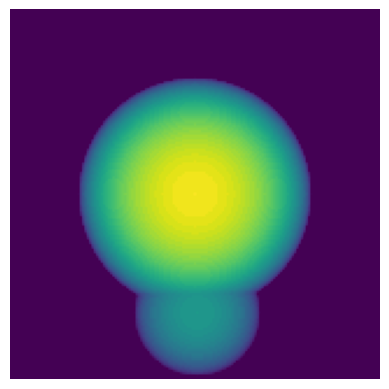

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_28.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


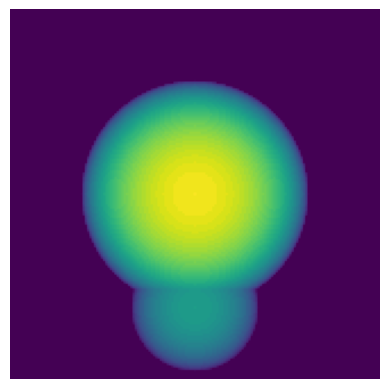

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_29.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


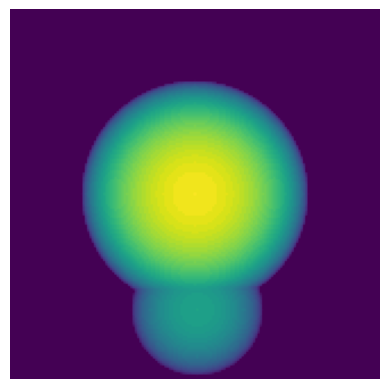

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_30.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


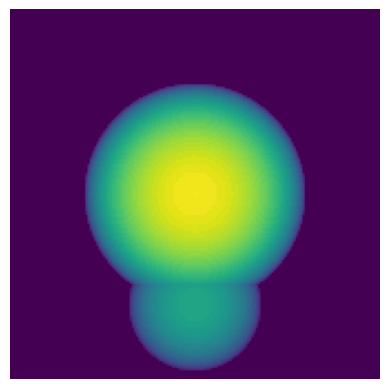

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_31.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


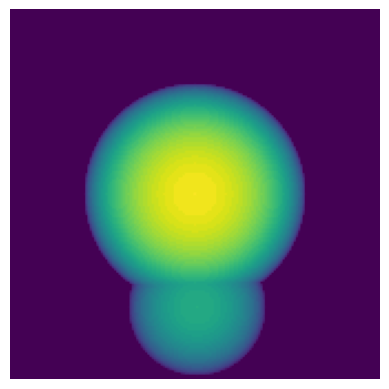

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_32.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


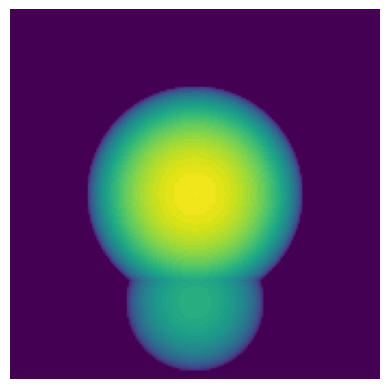

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_33.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


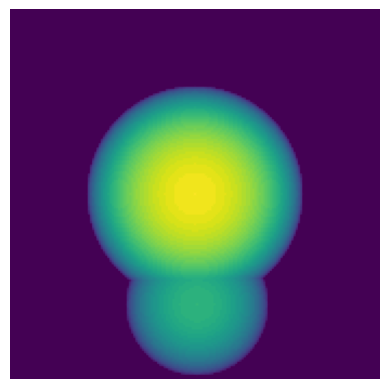

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_34.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


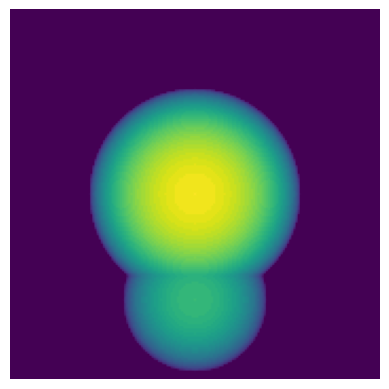

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_35.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


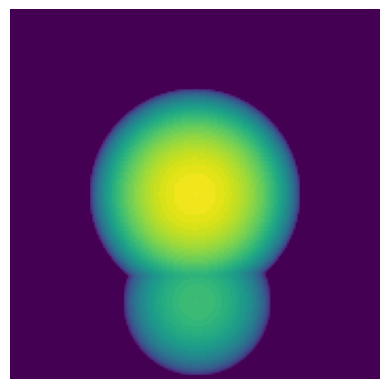

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_36.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


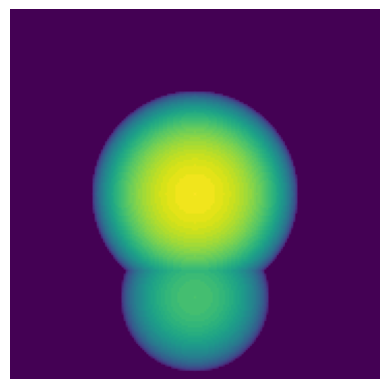

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_37.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


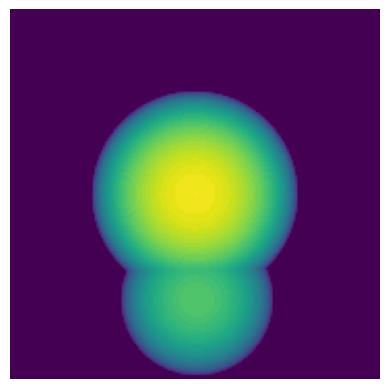

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_38.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


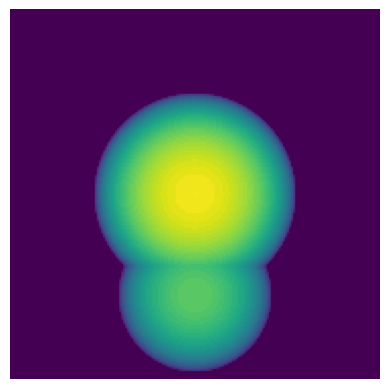

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_39.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


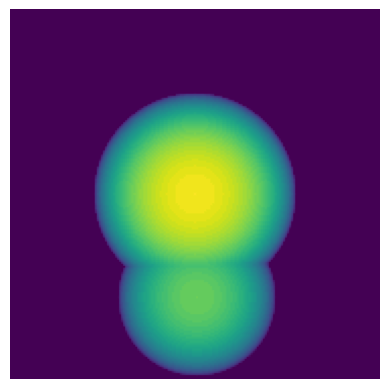

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_40.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


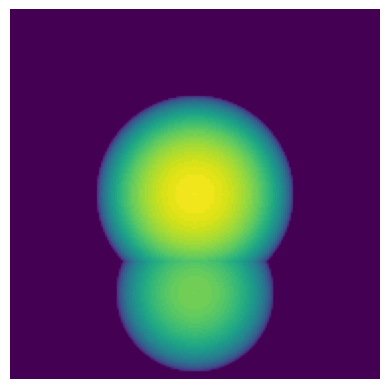

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_41.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


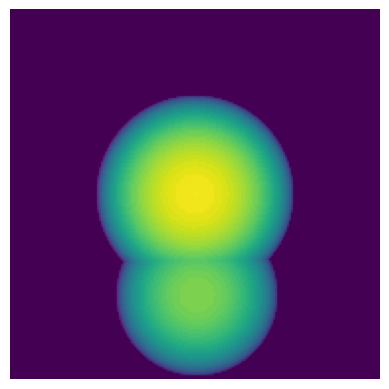

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_42.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


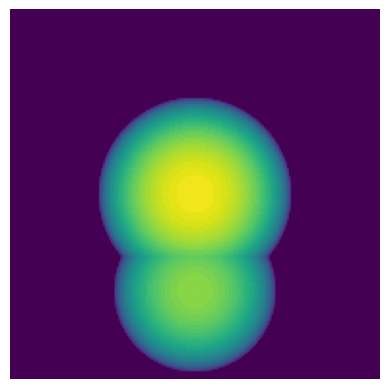

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_43.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


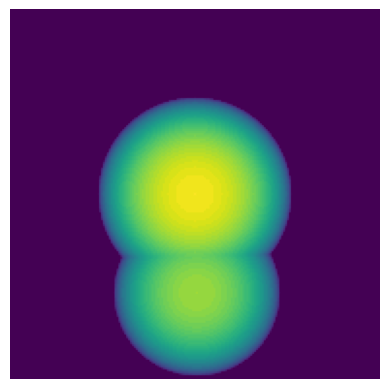

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_44.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


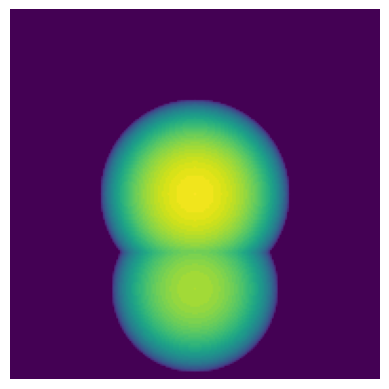

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_45.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


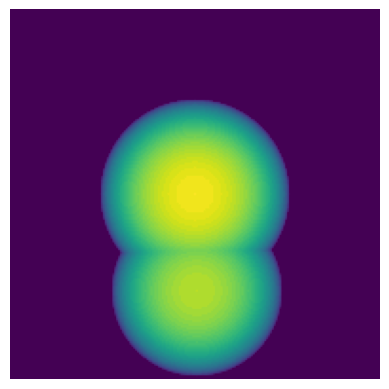

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_46.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


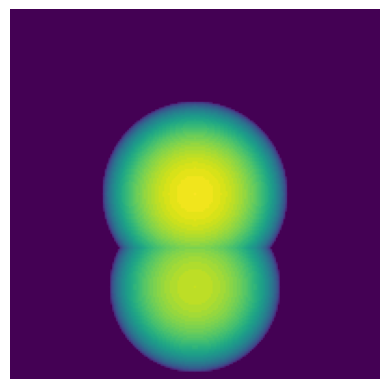

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_47.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


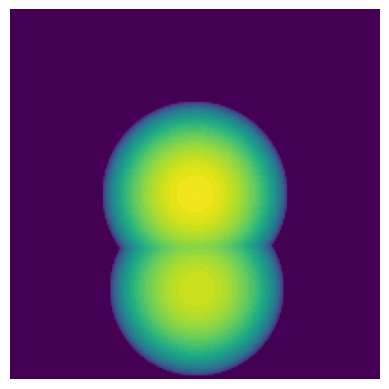

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_26945/1791832742.py:6: UserWarning: /Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast/r1_50_r2_48.tif is a low contrast image
  imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))


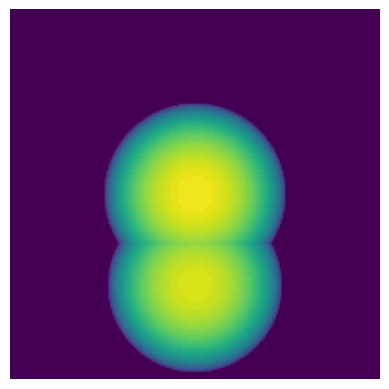

In [19]:
fpath = r'/Users/ryan/Desktop/toska_figs/reference_shapes/budding_yeast'
r1 = 50
r2 = np.arange(1, r1-1, 1)
for i in r2:
    arr = budding_yeast(r1, i)
    imsave(os.path.join(fpath, 'r1_' + str(r1) + '_r2_' + str(i) + '.tif'), arr.astype(np.uint8))
    plt.imshow(arr.sum(axis = 0))
    plt.axis('off')
    plt.show()

# Generate Labeled Budding Yeast

In [4]:
def marked_budding_yeast(r1, r2, axis = 1):
    
    arr_size = 2*r1 + 2*r2 + 2
    
    arr1 = ellipsoid(r1,r1,r1)
    pad_width = round((arr_size - arr1.shape[0])/2) + 1
    arr1 = np.pad(arr1, pad_width)
    
    arr2 = ellipsoid(r2,r2,r2)
    pad_width = round((arr_size - arr2.shape[0])/2) + 1
    arr2 = np.pad(arr2, pad_width)
    
    coords = np.asarray(np.where(arr2)).T
    coords[:, axis] = coords[:, axis] + r1
    
    zzz = coords[:,0]
    yyy = coords[:,1]
    xxx = coords[:,2]
    arr3 = np.zeros_like(arr1, dtype = np.uint8)
    arr3[zzz,yyy,xxx] = 2
    
    arr1 = arr1.astype(np.uint8) + arr3.astype(np.uint8)
    
    return arr1

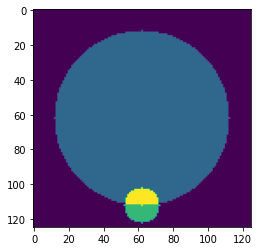

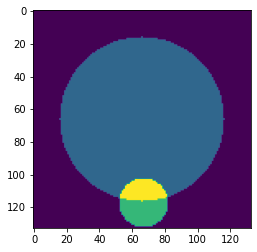

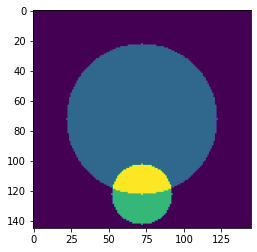

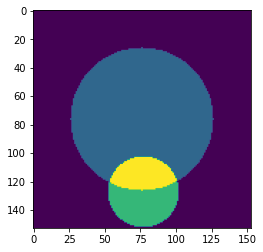

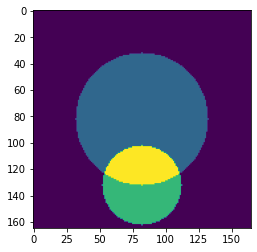

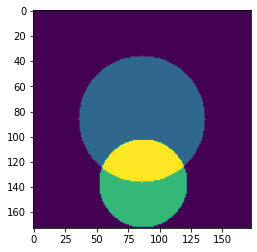

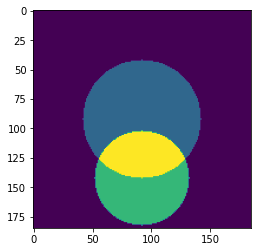

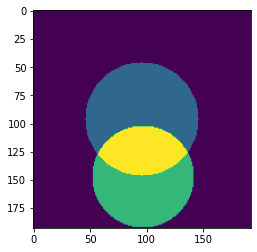

In [5]:
r1 = 50
r2 = np.arange(10, r1-1, 5)
for i in r2:
    arr = marked_budding_yeast(r1, i)
    plt.imshow(arr[round(arr.shape[0]/2),...])
    plt.show()

# Overlap Ellipsoids

In [35]:
def overlap_ellipsoids(ellip1_specs, ellip2_specs, offset):
    
    
    a,b,c = ellip1_specs
    ellip1 = ellipsoid(a,b,c)
    r1 = np.amax(ellip1_specs)
    axis = np.argmax(ellip1_specs)
    
    a,b,c = ellip2_specs
    ellip2 = ellipsoid(a,b,c)
    r2 = np.amax(ellip1_specs)
    arr_size = 2*r1 + 2*r2 + 2
    
    ellip1_pw = round((arr_size - ellip1.shape[0])/2) + 1
    ellip1 = np.pad(ellip1, ellip1_pw)
    
    
    ellip2_pw = round((arr_size - ellip2.shape[0])/2) + 1
    ellip2 = np.pad(ellip2, ellip2_pw)
    
    coords = np.asarray(np.where(ellip2)).T
    coords[:, axis] = coords[:, axis] + offset
    
    zzz = coords[:,0]
    yyy = coords[:,1]
    xxx = coords[:,2]
    ellip1[zzz,yyy,xxx] = 1
    
    return ellip1

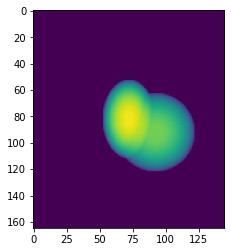

In [36]:
ellip1_specs = (50, 30, 20)
ellip2_specs = (40, 30, 30)
offset = 10
arr = overlap_ellipsoids(ellip1_specs, ellip2_specs, 10)
plt.imshow(arr.sum(axis = 0))
plt.show()

# Generate Wetting 'Droplets'

In [ ]:
def wetting_droplets(r):
    
    return arr